<a href="https://colab.research.google.com/github/alviantotonafom/UAS_ARTIFICIAL-INTELLIGENCE_20220801045_ALVIAN-TOTONAFO-MENDROFA/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informasi Atribut dalam Dataset**

1. show_id: ID unik untuk setiap Film / Acara TV

2. type: Pengenal - Film atau Acara TV

3. title: Judul Film / Acara TV

4. director: Sutradara Film

5. cast: Pemeran yang terlibat dalam film / acara

6. country: Negara tempat film / acara diproduksi

7. date_added: Tanggal ditambahkan di Netflix

8. release_year: Tahun rilis sebenarnya dari film / acara

9. rating: Rating TV dari film / acara

10. duration: Durasi total - dalam menit atau jumlah musim

11. listed_in: Genre

12. description: Ringkasan deskripsi

#**Mengimpor Pustaka Dasar (Libraries) dan Dataset**

In [1]:
import kagglehub

# Pustaka Umum untuk Analisis Data dan Visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import plotly.express as px
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Pustaka untuk Pemrosesan Bahasa Alami (NLP)
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Pustaka untuk Clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

# Menangani Peringatan
import warnings
warnings.filterwarnings('ignore')

##**Mengimpor Dataset**

In [2]:
!pip install kagglehub

# Unduh dataset
path = kagglehub.dataset_download("anandshaw2001/netflix-movies-and-tv-shows")

# Baca dataset ke dalam DataFrame Pandas
netflix_df = pd.read_csv(path + '/netflix_titles.csv')

#**Eksplorasi Data Dasar dan Pembersihan Data**


In [3]:
netflix_df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [4]:
netflix_df.tail()

show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R     88 min   
8805   January 11, 2020          2006     PG     88 min   
8806      March 2, 2019          2015  TV-14    111 min   

                                           listed_in  \
8802                  Cult Movies, Dramas, Thrillers   
8803          Kids' TV, Korean TV Shows, TV Comedies   
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [5]:
netflix_df.shape

(8807, 12)

we have **7787 rows** and **12 columns** in our data set.

In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# Informasi tentang data
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
# Memeriksa nilai duplikat
netflix_df.duplicated().sum()

0

In [9]:
# Deskripsi Data
netflix_df.describe(include = 'all')

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top     David Attenborough  United States  January 1, 2020           NaN   
freq                    19           2818              109           NaN   
mean                   NaN            NaN              NaN   2014.180198   
std                    NaN            NaN              NaN      8.819312   
min                    NaN            NaN              NaN   1925.000000   
25%                    NaN            NaN              NaN   2013.000000   
50%                    NaN            NaN              NaN   2017.000000   
75%                    NaN            NaN              NaN   2019.000000   
max                    NaN            NaN              NaN   2021.000000   

       rating  duration                     listed_in  \
count    8803      8804                          8807   
unique     17       220                           514   
top     TV-MA  1 Season  Dramas, International Movies   
freq     3207      1793                           362   
mean      NaN       NaN                           NaN   
std       NaN       NaN                           NaN   
min       NaN       NaN                           NaN   
25%       NaN       NaN                           NaN   
50%       NaN       NaN                           NaN   
75%       NaN       NaN                           NaN   
max       NaN       NaN                           NaN   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [10]:
# Memeriksa jumlah nilai kosong untuk setiap kolom
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# Memeriksa persentase nilai yang hilang
def missing_values_per_check(df):
    percent_missing = netflix_df.isnull().sum() * 100 / len(netflix_df)
    missing_values_df = pd.DataFrame({'column_name': netflix_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [12]:
missing_values_per_check(netflix_df)

column_name  percent_missing
director          director        29.908028
country            country         9.435676
cast                  cast         9.367549
date_added      date_added         0.113546
rating              rating         0.045418
duration          duration         0.034064
show_id            show_id         0.000000
type                  type         0.000000
title                title         0.000000
release_year  release_year         0.000000
listed_in        listed_in         0.000000
description    description         0.000000

**Menggunakan barplot untuk memeriksa jumlah nilai NaN yang ada dalam dataset ini**

<BarContainer object of 12 artists>

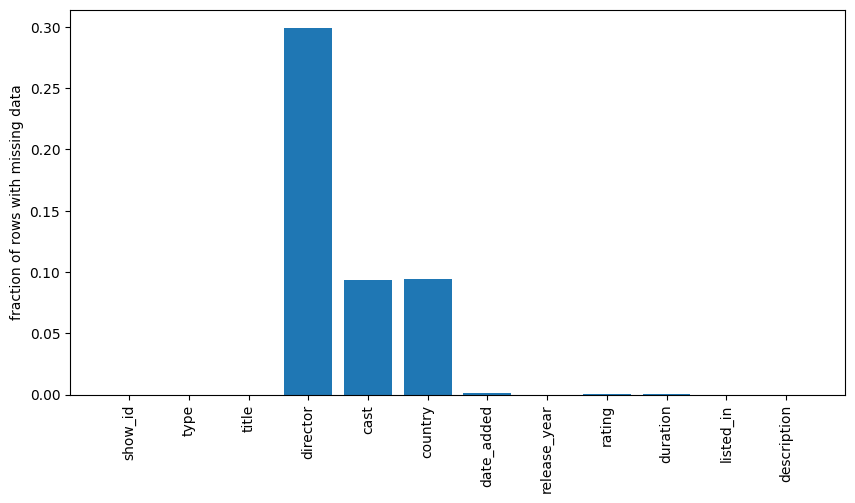

In [13]:
# Distribusi nilai kosong (null)
null_counts = netflix_df.isnull().sum()/len(netflix_df)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)


* Kolom **Director** memiliki nilai NaN tertinggi, 29,9% data hilang.
* Kolom **Cast** memiliki 9,4% nilai NaN.
* Kolom **country**, **date_added**, **rating**, dan **duration** juga mengandung nilai yang hilang.

In [14]:
# Menangani nilai yang hilang
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')

Mengisi nilai kosong pada kolom **Director**, **Cast** dan **Country** dengan '**Unknown**'

In [15]:
# Mencari modus (nilai yang paling sering muncul) pada kolom 'date_added'.
# Modus digunakan untuk mengisi nilai kosong karena 'date_added' merupakan data kategorikal (tanggal).
netflix_df['date_added'].mode()

0    January 1, 2020
Name: date_added, dtype: object

In [16]:
# Menetapkan nilai 'January 1, 2020' ke variabel 'a'.
# Nilai ini akan digunakan untuk mengisi nilai kosong pada kolom 'date_added'.
a = 'January 1, 2020'

# Mengisi nilai kosong (NaN) pada kolom 'date_added' dengan nilai yang disimpan dalam variabel 'a'.
# 'inplace=True' memastikan bahwa DataFrame asli diubah, bukan membuat salinan baru.
netflix_df['date_added'].fillna(a, inplace = True)

Kolom '**date_added**' mengandung nilai kosong. Untuk mengatasinya, kita akan mengisinya dengan '**January 1, 2020**'. Nilai ini dipilih karena merepresentasikan tanggal yang umum dan tidak akan memberikan bias pada analisis.

In [17]:
netflix_df['rating'].fillna(value = 'Not_Rated', inplace = True)

Kolom '**rating**' mengandung nilai kosong. Untuk mengatasinya, kita akan mengisinya dengan nilai '**Not_Rated**'.

In [18]:
# Mencari modus (nilai yang paling sering muncul) pada kolom 'duration'.
# Modus dapat memberikan informasi tentang durasi film/acara yang paling umum.
netflix_df['duration'].mode()

0    1 Season
Name: duration, dtype: object

In [19]:
# Menetapkan nilai '1 Season' ke variabel 'b'.
# Nilai ini akan digunakan untuk mengisi nilai kosong pada kolom 'duration'.
b = '1 Season'

netflix_df['duration'].fillna(value = b, inplace = True)

Kolom '**duration**' mengandung nilai kosong. Untuk mengatasinya, kita akan mengisinya dengan '**1 Season**'. Nilai ini dipilih karena merepresentasikan tanggal yang umum dan tidak akan memberikan bias pada analisis.

In [20]:
netflix_df.dropna(axis=0, inplace = True)

Memastikan kembali nilai kosong dalam data

In [21]:
# Memeriksa jumlah nilai kosong untuk setiap kolom
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Semua nilai kosong dalam dataset telah berhasil ditangani

### **Memeriksa Outliner pada Fitur date_added**




In [22]:
netflix_df.shape

(8807, 12)

In [23]:
netflix_df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [24]:
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

In [25]:
'''Mari kita hapus outlier dari fitur dependen 'release_year' dan 'date_added'. Kita dapat
skala fitur independen untuk mengurangi pengaruh outlier'''

netflix_df.date_added = pd.to_datetime(netflix_df.date_added)
# Deteksi Outlier
# IQR
def IQR_Outlier_remover(column, column_name):
    Q1 = np.percentile(column, 25,
                      interpolation = 'midpoint')

    Q3 = np.percentile(column, 75,
                      interpolation = 'midpoint')
    IQR = Q3 - Q1

    print(f"sebelum penghapusan outlier dari {column_name} Bentuk Lama: ", netflix_df.shape)

    # Batas Atas
    upper = np.where(column >= (Q3+1.5*IQR))
    # Batas Bawah
    lower = np.where(column <= (Q1-1.5*IQR))

    # Menghapus Outlier
    netflix_df.drop(upper[0], inplace = True)
    netflix_df.drop(lower[0], inplace = True)

    print(f"setelah penghapusan outlier dari {column_name} Bentuk Baru: ", netflix_df.shape)

# hapus outlier dari release_year
# IQR_Outlier_remover(netflix_df.release_year, 'release_year')

# hapus outlier dari date_added
IQR_Outlier_remover(netflix_df.date_added, 'date_added')

sebelum penghapusan outlier dari date_added Bentuk Lama:  (8807, 12)
setelah penghapusan outlier dari date_added Bentuk Baru:  (8766, 12)


Dengan bantuan teknik penghapusan outlier berdasarkan IQR, kita berhasil menghapus 41 baris berdasarkan outlier date_added

#**Eksplorasi Data (EDA)**

**1. Jenis konten yang tersedia di Netflix**

In [26]:
# Memeriksa jumlah acara TV dan film yang tersedia
netflix_df['type'].value_counts()

type
Movie      6098
TV Show    2668
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7dc29005f310>,
 [Text(-0.995182184850467, -0.4686282310704843, 'Movie'),
  Text(1.0404177845778133, 0.4899294168900202, 'TV Show')],
 [Text(-0.5428266462820729, -0.25561539876571865, '69.6%'),
  Text(0.5880622260657206, 0.2769166269378375, '30.4%')])

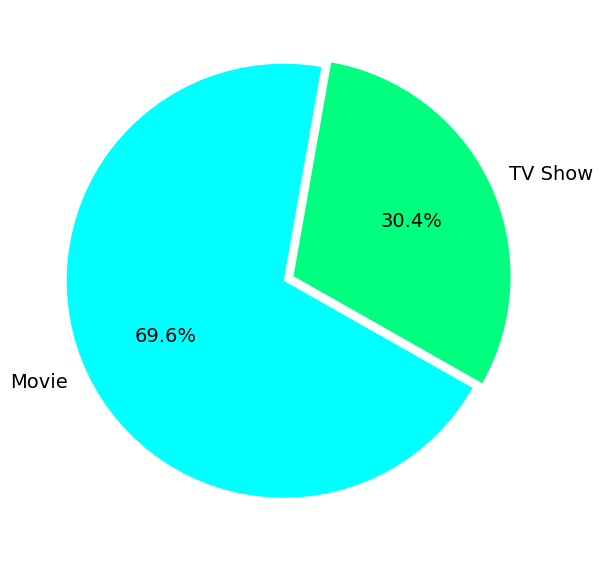

In [27]:
# Plot Grafik
plt.rcParams['figure.figsize'] = 7,8
labels = netflix_df['type'].value_counts().index.tolist()
size = netflix_df['type'].value_counts().tolist()
explode = (0, 0.05)
colors = ['aqua','springgreen']
plt.pie(size, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=80, textprops={'fontsize': 14})

**Observasi:**

  * Dalam dataset kita, sekitar 69,6% konten berupa film

  * Sisanya 30,4% berupa acara TV.

Di sini kita memiliki lebih banyak jumlah Film daripada acara TV.

**2. Rating film dan acara TV di Netflix**

Jumlah acara dengan peringkat tertinggi di Netflix adalah **TV-MA**, diikuti oleh **TV-14** dan **TV-PG**.

Untuk membuat analisis kita lebih efektif, kita akan mengubah nilai-nilai di kolom **rating**.

In [28]:
# Mengubah nilai
new_rating = {'TV-MA':'Dewasa',
              'R':'Dewasa',
              'PG-13':'Remaja',
              'TV-14':'Remaja Dewasa',
              'TV-PG':'Anak-anak Lebih Tua',
              'NR':'Dewasa',
              'TV-G':'Anak-anak',
              'TV-Y':'Anak-anak',
              'TV-Y7':'Anak-anak Lebih Tua',
              'PG':'Anak-anak Lebih Tua',
              'G':'Anak-anak',
              'NC-17':'Dewasa',
              'TV-Y7-FV':'Anak-anak Lebih Tua',
              'UR':'Dewasa',
              'Not_Rated' : 'Lainnya'}

In [29]:
# Mengkonversi Kategori
netflix_df['rating'].replace(new_rating, inplace = True)

# Hanya ambil baris dengan rating yang valid
valid_ratings = list(new_rating.values())  # Ambil daftar rating yang sudah diubah
netflix_df = netflix_df[netflix_df['rating'].isin(valid_ratings)]

In [30]:
# hitung total kategori peringkat
netflix_df['rating'].value_counts()

rating
Dewasa                 4072
Remaja Dewasa          2152
Anak-anak Lebih Tua    1479
Anak-anak               566
Remaja                  490
Lainnya                   4
Name: count, dtype: int64

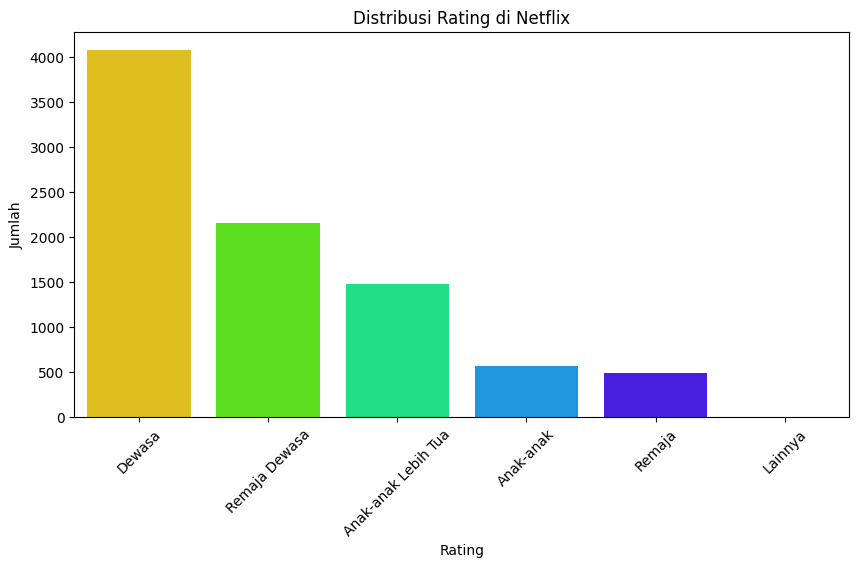

In [31]:
# Membuat plot kategori rating
plt.figure(figsize=(10, 5))
sns.countplot(
    x='rating',
    data=netflix_df,
    order=netflix_df['rating'].value_counts().index,
    palette="hsv"  # Menggunakan palet warna gradasi HSV
)

plt.xticks(rotation=45)  # Memutar label agar lebih terbaca
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.title('Distribusi Rating di Netflix')
plt.show()

**Observasi:**

  * Sebagian besar konten di Netflix diberi peringkat untuk Pemirsa Dewasa dan di atas 14 tahun.

  * Diikuti oleh remaja dewasa, anak-anak yang lebih tua, dan anak-anak.

  * Netflix memiliki jumlah acara paling sedikit yang diproduksi khusus untuk remaja dibandingkan kelompok usia lainnya.

**3. 10 Genre Teratas di Netflix**

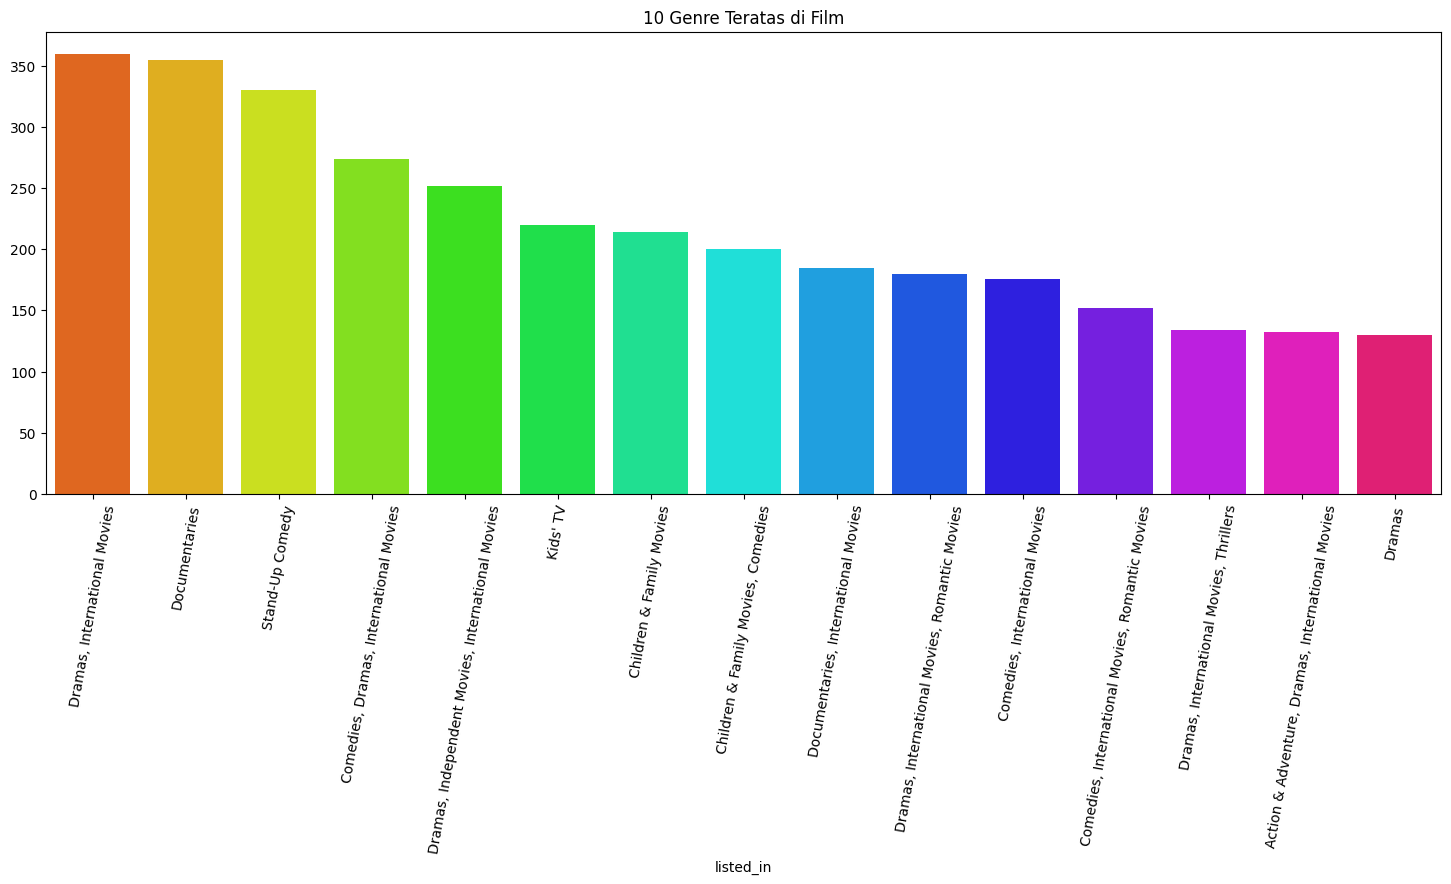

In [32]:
# 10 Genre Teratas di Film
plt.figure(figsize=(18,6))
sns.barplot(x =netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("10 Genre Teratas di Film")
plt.show()

**Drama, Film Internasional (Dramas, International Movies)** adalah genre teratas yang tersedia di Netflix. Di posisi kedua, kita memiliki **Dokumenter (Documentaries)** and **Komedi Tunggal (Stand-up comedy)**.



In [33]:
netflix_df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year  rating   duration  \
0 2021-09-25          2020  Remaja     90 min   
1 2021-09-24          2021  Dewasa  2 Seasons   
2 2021-09-24          2021  Dewasa   1 Season   
3 2021-09-24          2021  Dewasa   1 Season   
4 2021-09-24          2021  Dewasa  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

**4. Jumlah acara yang ditambahkan selama bertahun-tahun**

In [34]:
# ambil tanggal dari kolom date_added untuk eda
date_added = pd.to_datetime(netflix_df.date_added)

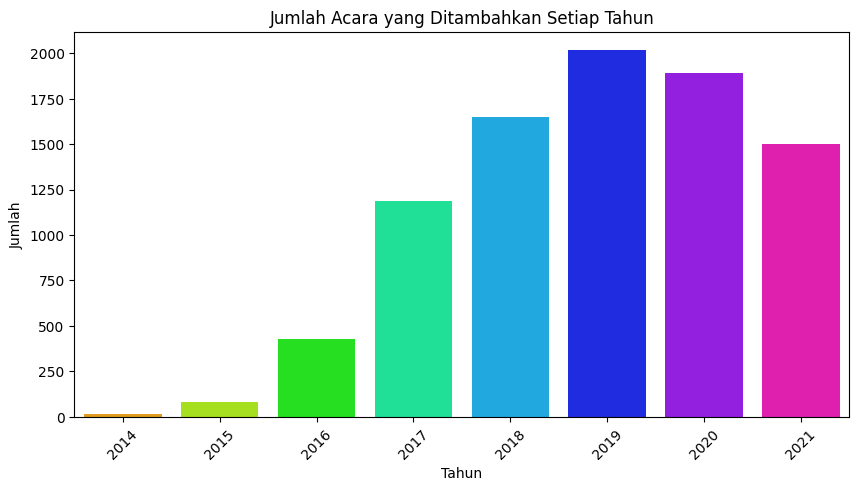

In [35]:
plt.figure(figsize=(10, 5))

# Menghitung jumlah acara berdasarkan tahun dan mengurutkan tahun secara ascending
year_counts = netflix_df['date_added'].dt.year.value_counts().sort_index()

# Membuat plot dengan urutan tahun yang benar
sns.barplot(
    x=year_counts.index,
    y=year_counts.values,
    palette="hsv"
)

plt.title('Jumlah Acara yang Ditambahkan Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

* Jumlah rilis telah meningkat secara signifikan setelah **2015**.
* Kita memiliki jumlah rilis tertinggi pada tahun **2019**.
* Rilis telah menurun pada **2021** karena Covid 19.

**5. Bulan Rilis Konten yang Berbeda di Netflix**

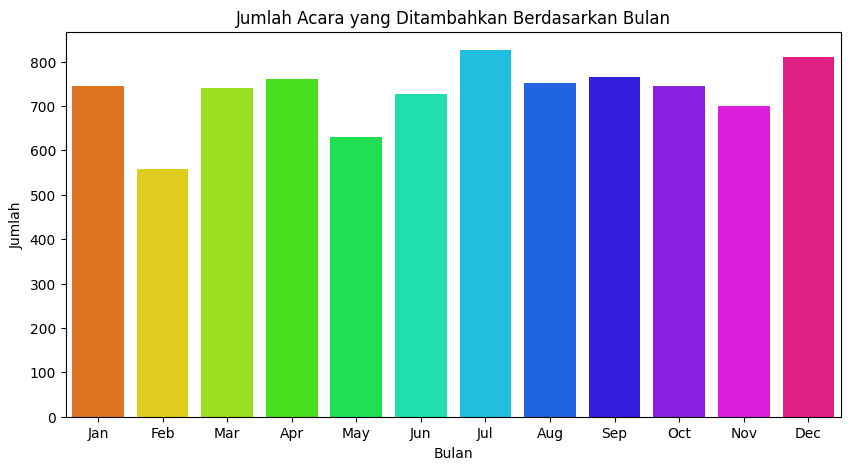

In [36]:
# Plotting Countplot berdasarkan bulan
plt.figure(figsize=(10,5))
ax = sns.countplot(x=netflix_df['date_added'].dt.month, palette="hsv")

plt.title('Jumlah Acara yang Ditambahkan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Jumlah maksimum film dan acara TV ditambahkan dari Mei hingga Desember

**6. Kata yang Paling Sering Digunakan dalam Judul Konten di Netflix**

Plot wordcloud untuk melihat kata-kata utama di kolom judul

In [37]:
# Mengimporwordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 164006 words in the combination of all titles.


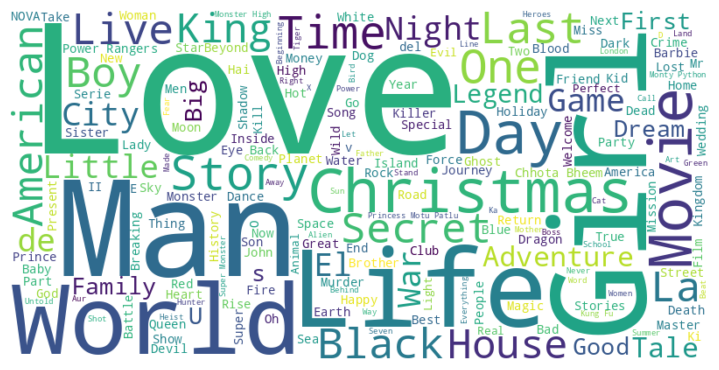

In [38]:
# memeriksa word cloud dari kolom judul
text = " ".join(topic for topic in netflix_df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Buat dan hasilkan gambar word cloud:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (14,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**'Love', 'Christmas', 'World', 'Story', 'Man', 'Live', 'Girl', 'Life'** ini adalah kata-kata yang paling sering muncul dalam judul Film dan Acara TV.

**7. Pemeran yang Sering Muncul di Netflix**

In [39]:
# Buat daftar semua aktor dalam data
def data2list(data):
  actor_list = {}
  temp_list = []
  cast_list = list(data['cast'])
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [40]:
# Buat dataframe untuk ssemua aktor dalam data
actor_list = pd.DataFrame([data2list(netflix_df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)

In [41]:
actor_list.head(5)

index    0
0               Unknown  823
1450        Anupam Kher   39
305        Rupa Bhimani   31
5056   Takahiro Sakurai   30
304       Julie Tejwani   28

In [42]:
# Membuat Plot
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Nama Aktor', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Nama Aktor', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Aktor dengan konten terbanyak di platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show()

Aktor teratas di Netflix adalah:

* Anupam Kher
* Rupa Bhimani
* Takahiro Sakurai
* Julie Tejwani
* Om Puri

**8. Jumlah Musim (Seasons) Acara TV**

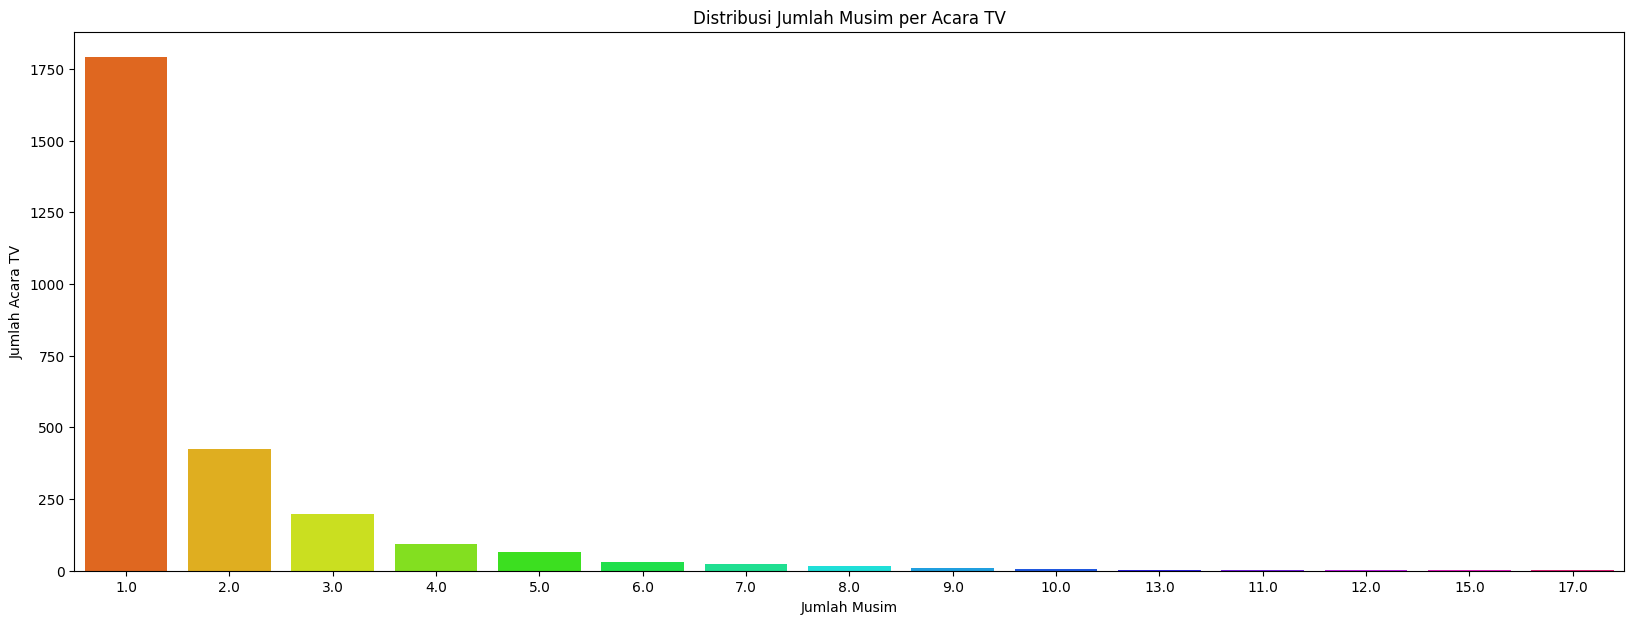

In [43]:
# Pastikan 'duration' dalam format string dan ambil angka musim
netflix_df['season_count'] = netflix_df['duration'].str.extract('(\d+)').astype(float)

# Filter hanya acara TV dan urutkan berdasarkan musim
tv_shows = netflix_df[netflix_df['type'] == 'TV Show'].dropna(subset=['season_count'])
tv_shows_sorted = tv_shows.sort_values(by='season_count')

# Plotting Countplot dengan urutan musim dan palette hsv
plt.figure(figsize=(20,7))
p = sns.countplot(x='season_count', data=tv_shows_sorted, palette="hsv", order=tv_shows_sorted['season_count'].value_counts().index)

plt.title('Distribusi Jumlah Musim per Acara TV')
plt.xlabel('Jumlah Musim')
plt.ylabel('Jumlah Acara TV')
plt.show()

* Sebagian besar acara TV hanya memiliki **1 Musim**.

* Serial TV dalam dataset memiliki hingga **17 musim**.

* Hanya ada sedikit acara TV yang memiliki lebih dari **8 musim**.

**9. 10 Negara Teratas dengan Jumlah Film/Acara TV Terbanyak di Netflix**



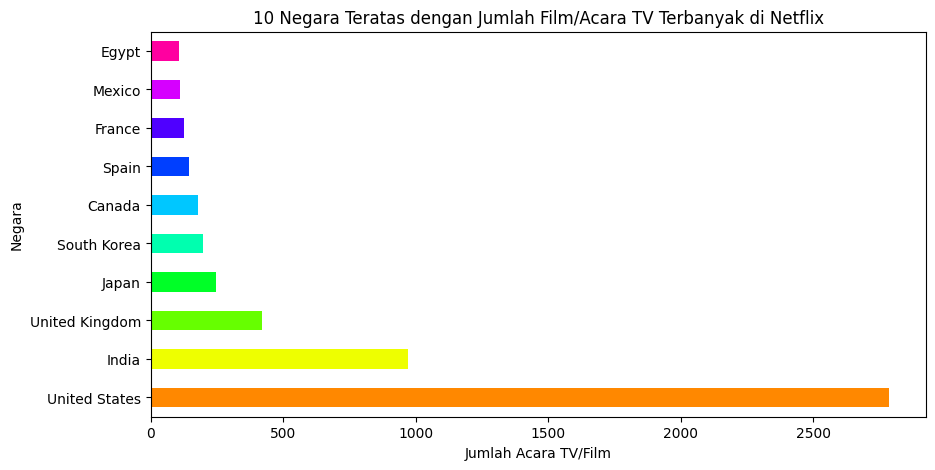

In [44]:
# Plotting Grafik Negara Teratas
plt.figure(figsize=(10,5))
top_10_countries = netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10)

# Membuat plot horizontal dengan palette 'hsv'
top_10_countries.plot(kind='barh', color=sns.color_palette('hsv', len(top_10_countries)))

plt.title('10 Negara Teratas dengan Jumlah Film/Acara TV Terbanyak di Netflix')
plt.xlabel('Jumlah Acara TV/Film')
plt.ylabel('Negara')
plt.show()

Jumlah film / acara TV terbanyak berasal dari  **United States**, diikuti oleh **India & United Kingdom**.

#**Rekayasa Fitur**

1 . Memisahkan Kolom **Date_added**

In [45]:
netflix_df['date_added'][1]

Timestamp('2021-09-24 00:00:00')

In [46]:
# Mengonversi kolom date_added ke datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

Kolom **date_added** kita berhasil dikonversi ke tipe **datetime**.

Sekarang kita akan mengekstrak **Year, month serta date** dari kolom date_added dan membuat kolom terpisah untuk masing-masing demi kemudahan operasi.

In [47]:
netflix_df.head(1)

show_id   type                 title         director     cast  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  Unknown   

         country date_added  release_year  rating duration      listed_in  \
0  United States 2021-09-25          2020  Remaja   90 min  Documentaries   

                                         description  season_count  
0  As her father nears the end of his life, filmm...          90.0

Kita akan menghapus kolom **date_added** dan **release year** karena kita membuat kolom terpisah untuk itu sesuai dengan **tahun dan bulan**

2. Mengubah Nama Kolom **listed_in** menjadi **genres**

In [48]:
netflix_df.rename(columns = {'listed_in' : 'genres'},inplace = True)

In [49]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'season_count'],
      dtype='object')

#**Data Pre-Processing**

Bag of words adalah teknik **Pemrosesan Bahasa Alami (Natural Language Processing)** untuk pemodelan teks. Bag of words adalah representasi teks yang menggambarkan kemunculan kata-kata dalam sebuah dokumen. Kita hanya melacak jumlah kata dan mengabaikan detail tata bahasa dan urutan kata. Ini disebut "bag" (kantong) kata karena informasi apa pun tentang urutan atau struktur kata dalam dokumen diabaikan.

In [50]:
# Mengimpor beberapa pustaka penting untuk Pemrosesan Teks
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.translate.nist_score import ngrams
from gensim.models import word2vec, FastText
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.decomposition import PCA
import re
from textblob import Word

# mengunduh nltk stopwords yang tidak datang secara default di nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
# Menghapus kolom yang tidak relevan setelah tahap EDA
netflix_df.drop(columns=['season_count'], inplace=True)

In [52]:
netflix_df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year  rating   duration  \
0 2021-09-25          2020  Remaja     90 min   
1 2021-09-24          2021  Dewasa  2 Seasons   
2 2021-09-24          2021  Dewasa   1 Season   
3 2021-09-24          2021  Dewasa   1 Season   
4 2021-09-24          2021  Dewasa  2 Seasons   

                                              genres  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [53]:
# mengganti fitur tipe dari kategorikal ke numerik
netflix_df['type'] = np.where(netflix_df['type'] == 'TV Show' ,1,0)

In [54]:
# Mengonversi rating menjadi numerik

# Fungsi untuk mengembalikan nilai numerik dari setiap rating
def rating_rep(wor):
  new_ratings = {'Dewasa':0, 'Remaja':1, 'Remaja Dewasa':2, 'Anak-anak Lebih Tua':3, 'Anak-anak':4, 'Lainnya':5}
  return new_ratings[wor]

# Mengonversi rating di DataFrame
netflix_df['rating'] = netflix_df.rating.apply(lambda x: rating_rep(x))

In [55]:
# Mendefinisikan fungsi untuk memisahkan kalimat menjadi kata-kata
def split_word(par):
  return par.split(',')

# Fungsi untuk mengubah kata menjadi huruf kecil
def word_lower(wor):
  return wor.lower()

# Fungsi untuk menghapus spasi di awal dan akhir kata
def word_strip(wor):
  return wor.strip()

In [56]:
# Mengubah semua fitur teks menjadi huruf kecil
netflix_df['cast'] = netflix_df['cast'].apply(lambda word: word_lower(word))
netflix_df['director'] = netflix_df['director'].apply(lambda word: word_lower(word))
netflix_df['country'] = netflix_df['country'].apply(lambda word: word_lower(word))
netflix_df['genres'] = netflix_df['genres'].apply(lambda word: word_lower(word))
netflix_df['description'] = netflix_df['description'].apply(lambda word: word_lower(word))

In [57]:
# menerapkan count vectorizer ke cast
import re
re_exp = r"\,"
count_vec = CountVectorizer(tokenizer=lambda text: re.split(re_exp,text), min_df= 2)

cast_vec = count_vec.fit_transform(netflix_df['cast'])
cast_feature_names = count_vec.get_feature_names_out()
dense_cast = cast_vec .todense()
# denselist = dense.tolist()
cast_vector = pd.DataFrame(dense_cast, columns=cast_feature_names)

In [58]:
# menerapkan count vectorizer ke genres

genre_vec = count_vec.fit_transform(netflix_df['genres'])
gen_feature_names = count_vec.get_feature_names_out()  # Perbaikan: get_feature_names_out()
dense_gen = genre_vec.todense()
# denselist = dense.tolist()
gen_vector = pd.DataFrame(dense_gen, columns=gen_feature_names)

In [59]:
# country_vector = netflix_df['country'].str.split(pat = ",", expand=True).apply(lambda x : x.value_counts(), axis = 1).fillna(0).astype(int)

# menerapkan count vectorizer ke country

country_vec = count_vec.fit_transform(netflix_df['country'])
coun_feature_names = count_vec.get_feature_names_out()  # Perbaikan: get_feature_names_out()
dense_coun = country_vec .todense()
# denselist = dense.tolist()
coun_vector = pd.DataFrame(dense_coun, columns=coun_feature_names)

 **Selanjutnya dengan fitur Deskripsi**




In [60]:
## menghapus tabulasi dan tanda baca
netflix_df['new_description'] = netflix_df['description'].str.replace('[^\w\s]',' ')

## digit
netflix_df['new_description'] = netflix_df['description'].str.replace('\d+', '')

#menghapus stop words
stop = stopwords.words('english')
netflix_df['new_description'] =netflix_df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatisasi
netflix_df['new_description'] = netflix_df['new_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# print("Data yang telah diproses sebelumnya: \n")
print(netflix_df.head(1))

  show_id  type                 title         director     cast  \
0      s1     0  Dick Johnson Is Dead  kirsten johnson  unknown   

         country date_added  release_year  rating duration         genres  \
0  united states 2021-09-25          2020       1   90 min  documentaries   

                                         description  \
0  as her father nears the end of his life, filmm...   

                                     new_description  
0  father nears end life, filmmaker kirsten johns...  


In [61]:
netflix_df.head()

show_id  type                  title         director  \
0      s1     0   Dick Johnson Is Dead  kirsten johnson   
1      s2     1          Blood & Water          unknown   
2      s3     1              Ganglands  julien leclercq   
3      s4     1  Jailbirds New Orleans          unknown   
4      s5     1           Kota Factory          unknown   

                                                cast        country  \
0                                            unknown  united states   
1  ama qamata, khosi ngema, gail mabalane, thaban...   south africa   
2  sami bouajila, tracy gotoas, samuel jouy, nabi...        unknown   
3                                            unknown        unknown   
4  mayur more, jitendra kumar, ranjan raj, alam k...          india   

  date_added  release_year  rating   duration  \
0 2021-09-25          2020       1     90 min   
1 2021-09-24          2021       0  2 Seasons   
2 2021-09-24          2021       0   1 Season   
3 2021-09-24          2021       0   1 Season   
4 2021-09-24          2021       0  2 Seasons   

                                              genres  \
0                                      documentaries   
1    international tv shows, tv dramas, tv mysteries   
2  crime tv shows, international tv shows, tv act...   
3                             docuseries, reality tv   
4  international tv shows, romantic tv shows, tv ...   

                                         description  \
0  as her father nears the end of his life, filmm...   
1  after crossing paths at a party, a cape town t...   
2  to protect his family from a powerful drug lor...   
3  feuds, flirtations and toilet talk go down amo...   
4  in a city of coaching centers known to train i...   

                                     new_description  
0  father nears end life, filmmaker kirsten johns...  
1  crossing path party, cape town teen set prove ...  
2  protect family powerful drug lord, skilled thi...  
3  feuds, flirtation toilet talk go among incarce...  
4  city coaching center known train india’s fines...

In [62]:
# mari kita buat vektor tfidf untuk deskripsi
# vectorizer = TfidfVectorizer(ngram_range = (2,2), max_features= 20000, min_df = 2)
vectorizer = TfidfVectorizer( max_features= 20000, min_df = 2)
# vectorizer = CountVectorizer(ngram_range = (3,3))
vectors = vectorizer.fit_transform(netflix_df['new_description'])
feature_names = vectorizer.get_feature_names_out()
dense_desc = vectors.todense()
# denselist = dense.tolist() # kode opsional (konversi ke list akan menggunakan memori tinggi)
temp_df_desc = pd.DataFrame(dense_desc, columns=feature_names)

## MinMax Scaling pada Tipe dan rating karena keduanya merupakan satu-satunya kolom dengan nilai yang berkisar selain 0-1

In [63]:
# fitur untuk disertakan dari netflix_df   :   tipe, rating
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rating_n_type = scaler.fit_transform(netflix_df[['rating','type']])
rating_n_type =  pd.DataFrame(rating_n_type , columns = ['rating','type'])

## Membuat dataframe baru untuk clustering

In [64]:
# buat dataframe baru
new_df = pd.concat([rating_n_type, cast_vector, gen_vector, coun_vector, temp_df_desc], axis = 1)

In [65]:
new_df.head()

rating  type    jr.   50 cent   a.d. miles   a.j. cook   a.j. locascio  \
0     0.2   0.0      0         0            0           0               0   
1     0.0   1.0      0         0            0           0               0   
2     0.0   1.0      0         0            0           0               0   
3     0.0   1.0      0         0            0           0               0   
4     0.0   1.0      0         0            0           0               0   

    a.k. hangal   aadarsh balakrishna   aahana kumra  ...  zip  zodiac  zoe  \
0             0                     0              0  ...  0.0     0.0  0.0   
1             0                     0              0  ...  0.0     0.0  0.0   
2             0                     0              0  ...  0.0     0.0  0.0   
3             0                     0              0  ...  0.0     0.0  0.0   
4             0                     0              0  ...  0.0     0.0  0.0   

   zombie  zombies  zone  zoo  zoom  álex  über  
0     0.0      0.0   0.0  0.0   0.0   0.0   0.0  
1     0.0      0.0   0.0  0.0   0.0   0.0   0.0  
2     0.0      0.0   0.0  0.0   0.0   0.0   0.0  
3     0.0      0.0   0.0  0.0   0.0   0.0   0.0  
4     0.0      0.0   0.0  0.0   0.0   0.0   0.0  

[5 rows x 20567 columns]

## Terapkan PCA pada DataFrame

In [66]:
# import pca dan buat objeknya
from sklearn.decomposition import PCA
pca_test = PCA()
pca_test.fit_transform(new_df)

array([[-2.79742982e-01,  8.54764394e-01, -5.21245417e-02, ...,
        -2.00187756e-19,  2.62626446e-20, -2.55246005e-20],
       [-8.56692096e-01, -8.16640539e-01,  9.64934978e-02, ...,
        -2.00187756e-19,  2.62626446e-20, -2.55246005e-20],
       [-7.87412523e-01, -7.74071127e-01,  2.09078495e-02, ...,
        -2.00187756e-19,  2.62626446e-20, -2.55246005e-20],
       ...,
       [-4.53756033e-02,  7.83847854e-01, -4.15803473e-01, ...,
        -2.00187756e-19,  2.62626446e-20, -2.55246005e-20],
       [-2.65589457e-01,  8.89249924e-01, -1.89624885e-01, ...,
        -2.00187756e-19,  2.62626446e-20, -2.55246005e-20],
       [ 1.11403205e+00, -4.03926967e-01,  5.45529397e-01, ...,
        -2.00187756e-19,  2.62626446e-20, -2.55246005e-20]])

Text(0, 0.5, 'Varians yang Dijelaskan Kumulatif')

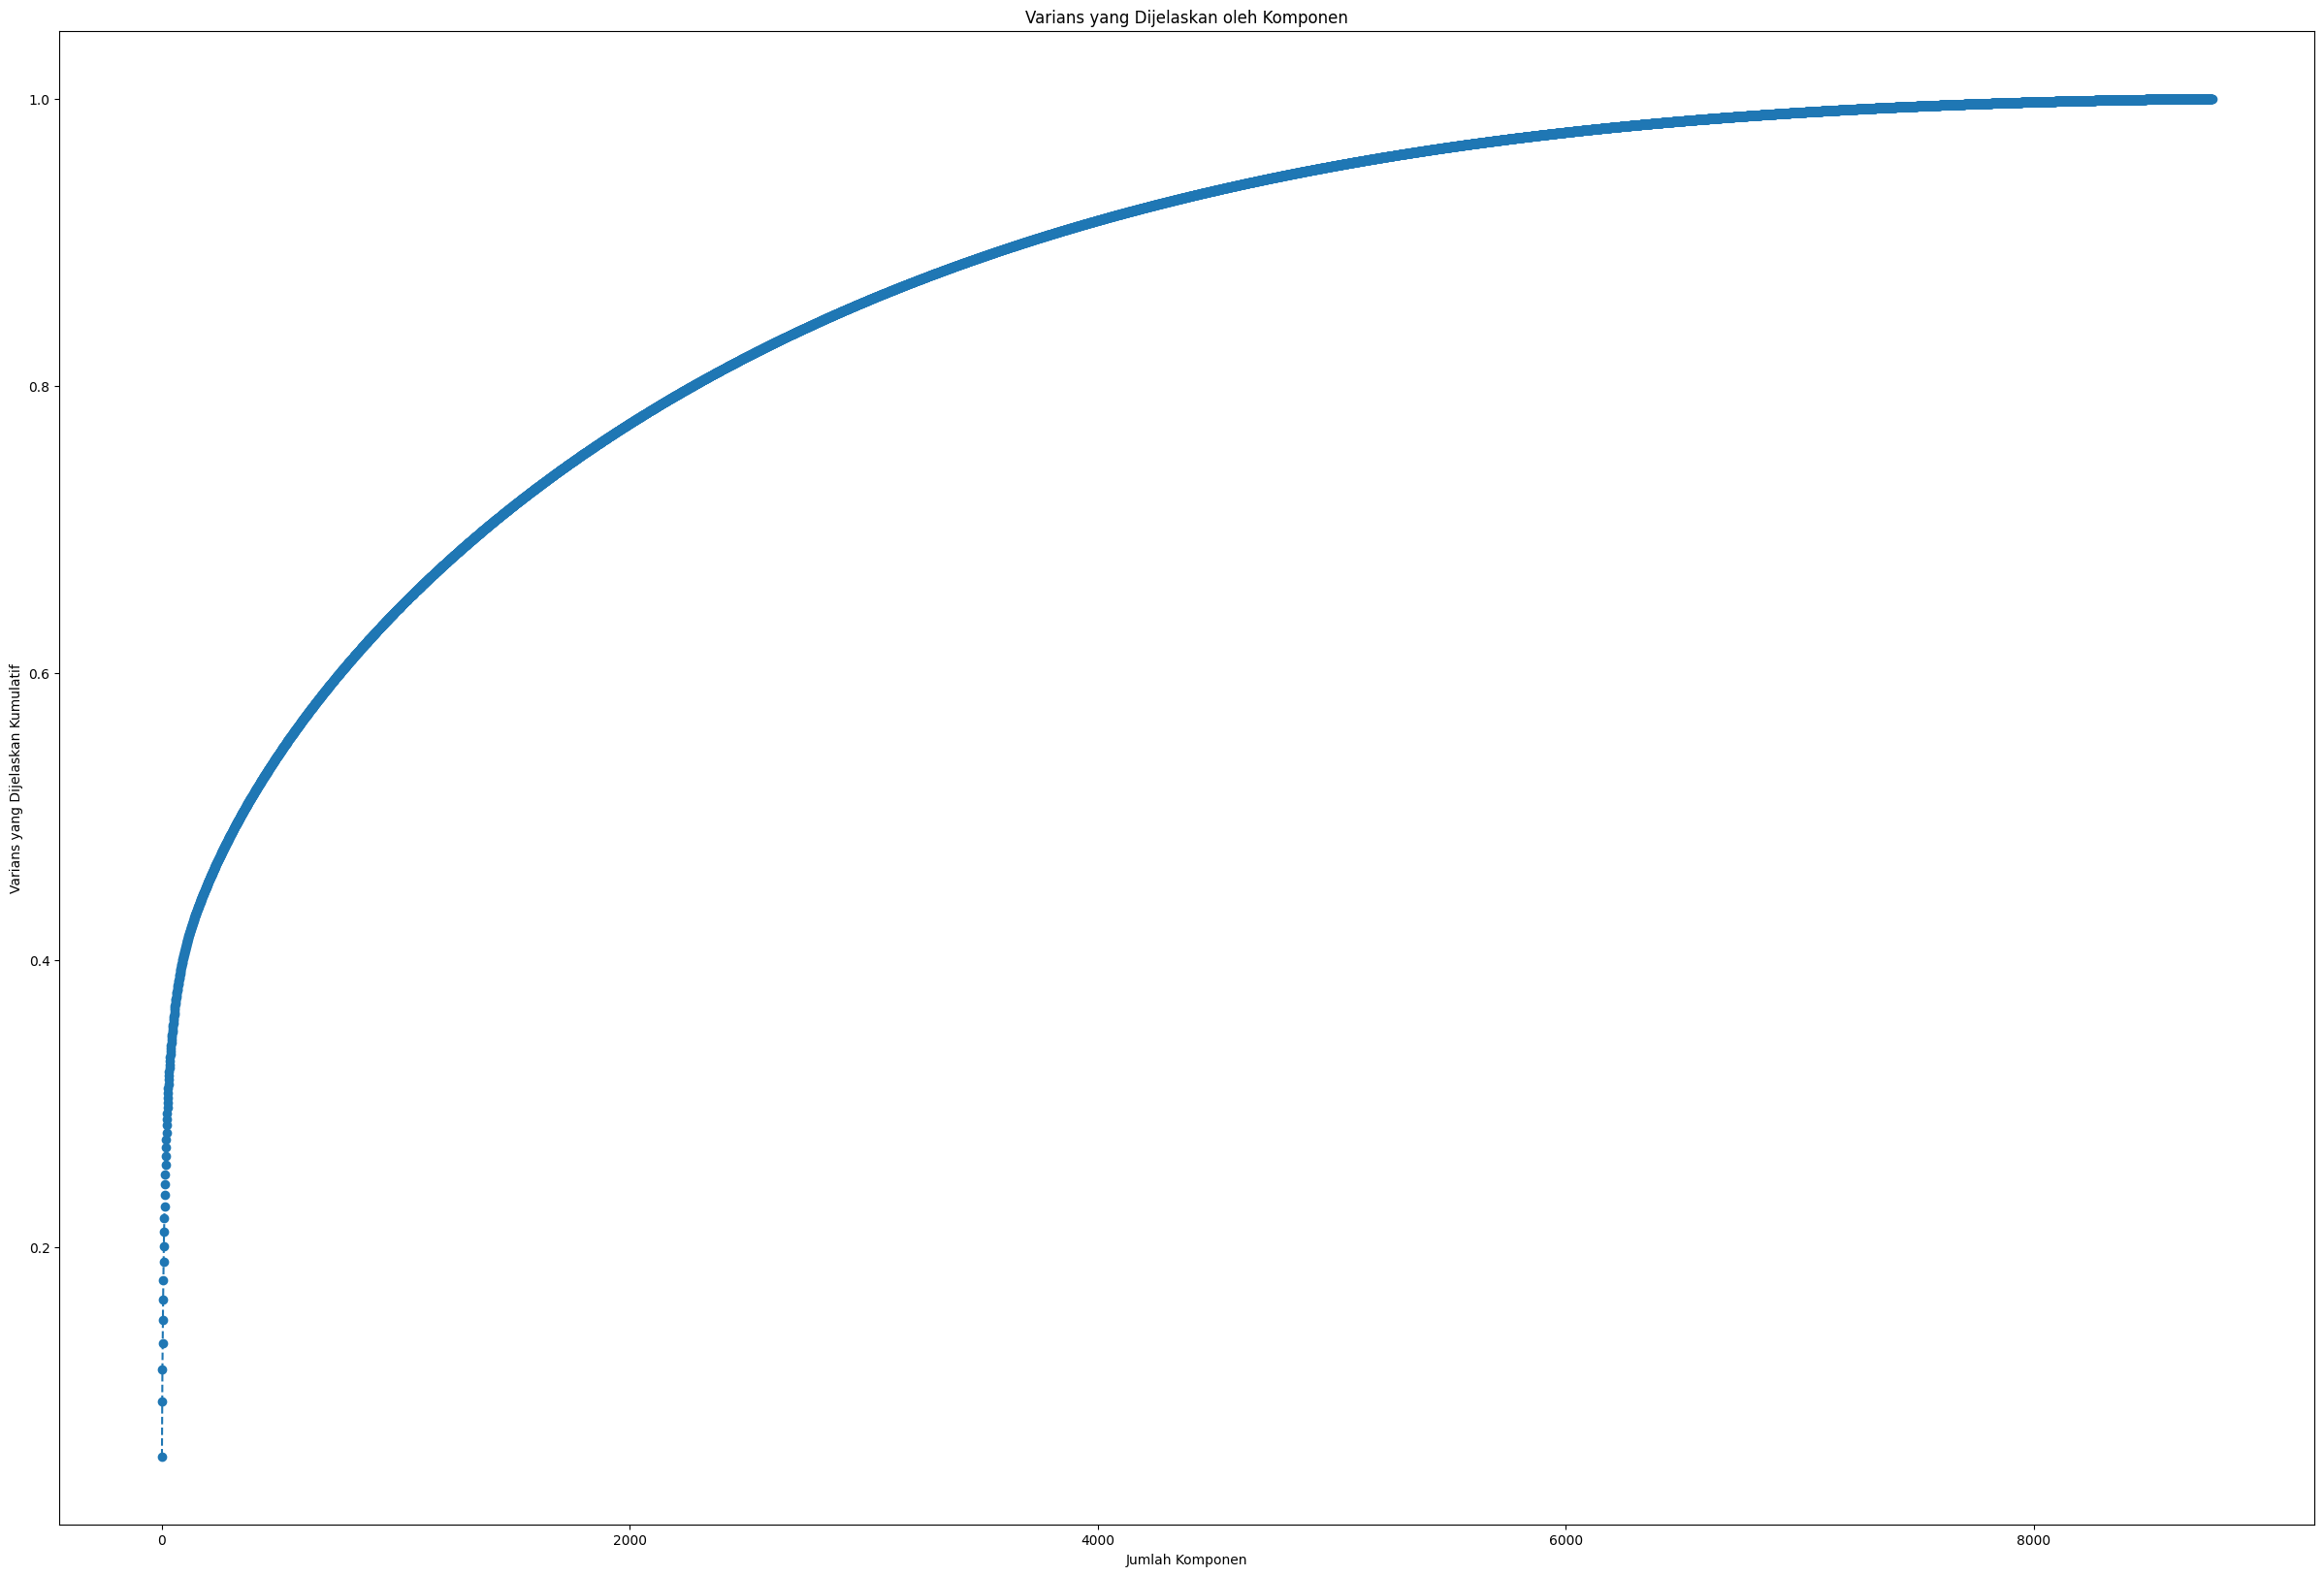

In [67]:
# plot plot varians yang dijelaskan oleh komponen untuk memilih jumlah optimal n_komponen
plt.figure(figsize = (30,20))
plt.plot(range(1, len(pca_test.explained_variance_ratio_) + 1),pca_test.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Varians yang Dijelaskan oleh Komponen')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Varians yang Dijelaskan Kumulatif')

### Grafik menunjukkan jumlah varians yang ditangkap (pada sumbu y) tergantung pada jumlah komponen yang kita sertakan (sumbu x). Aturan praktisnya adalah mempertahankan sekitar 80-85% dari varians. Jadi, dalam contoh ini, memutuskan untuk menyimpan 3000 komponen.

### **Buat PCA dengan n_component = 3000**

In [68]:
# pca dengan 3000 komponen utama
pca = PCA(n_components = 3000)
pca_score = pca.fit_transform(new_df)

#  **Pemodelan dengan KMeans Clustering**

In [69]:
# convert dataframe ke array untuk clustering
X = pca_score

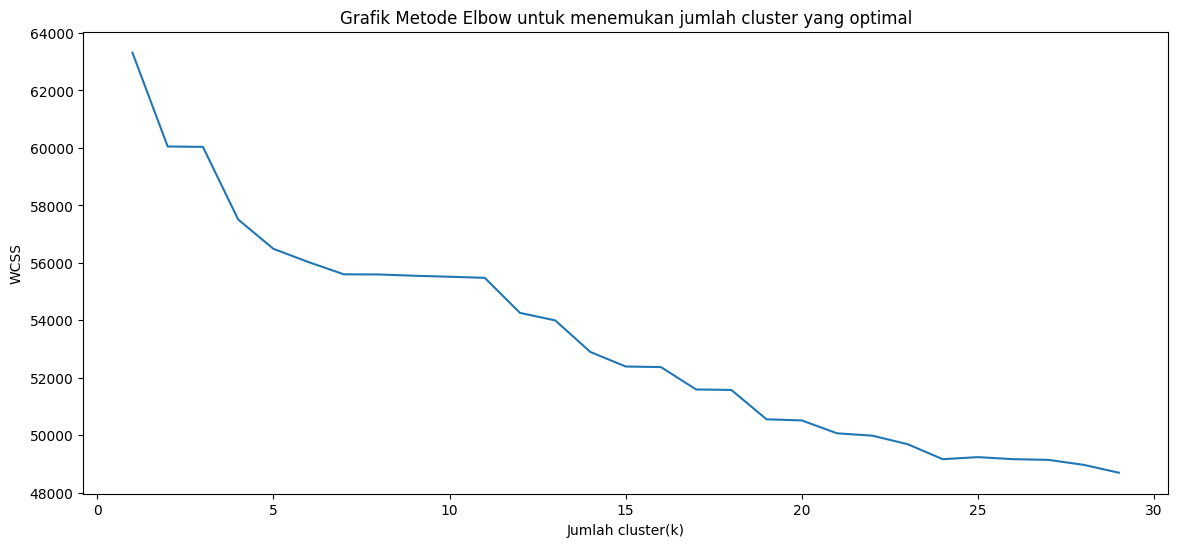

In [75]:
#mencari jumlah cluster yang optimal menggunakan metode elbow
from sklearn.cluster import KMeans
wcss_list= []  #Menginisialisasi list untuk nilai-nilai WCSS

#Menggunakan for loop untuk iterasi dari 1 hingga 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 10)
    kmeans.fit(pca_score)

    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('Grafik Metode Elbow untuk menemukan jumlah cluster yang optimal')
plt.xlabel('Jumlah cluster(k)')
plt.ylabel('WCSS')
plt.show()

### sekarang mari kita periksa skor siluet (Silhouette Score)

In [76]:
from sklearn.metrics import silhouette_score
#skor siluet dari cluster
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=10)
    model.fit(pca_score)
    y1 = model.predict(pca_score)
    score = silhouette_score(pca_score,y1)
    sill.append(score)
    print('cluster: %d \t Siluet: %0.4f'%(i,score))

cluster: 2 	 Siluet: 0.0579
cluster: 3 	 Siluet: 0.0579
cluster: 4 	 Siluet: 0.0650
cluster: 5 	 Siluet: 0.0567
cluster: 6 	 Siluet: 0.0427
cluster: 7 	 Siluet: 0.0358
cluster: 8 	 Siluet: 0.0377
cluster: 9 	 Siluet: 0.0374
cluster: 10 	 Siluet: 0.0378
cluster: 11 	 Siluet: 0.0449
cluster: 12 	 Siluet: 0.0497
cluster: 13 	 Siluet: 0.0466
cluster: 14 	 Siluet: 0.0409
cluster: 15 	 Siluet: 0.0409
cluster: 16 	 Siluet: 0.0410
cluster: 17 	 Siluet: 0.0456
cluster: 18 	 Siluet: -0.0022
cluster: 19 	 Siluet: 0.0052
cluster: 20 	 Siluet: 0.0056
cluster: 21 	 Siluet: -0.0064
cluster: 22 	 Siluet: -0.0057
cluster: 23 	 Siluet: -0.0038
cluster: 24 	 Siluet: -0.0271
cluster: 25 	 Siluet: -0.0276
cluster: 26 	 Siluet: -0.0269
cluster: 27 	 Siluet: -0.0268
cluster: 28 	 Siluet: -0.0256
cluster: 29 	 Siluet: -0.0231


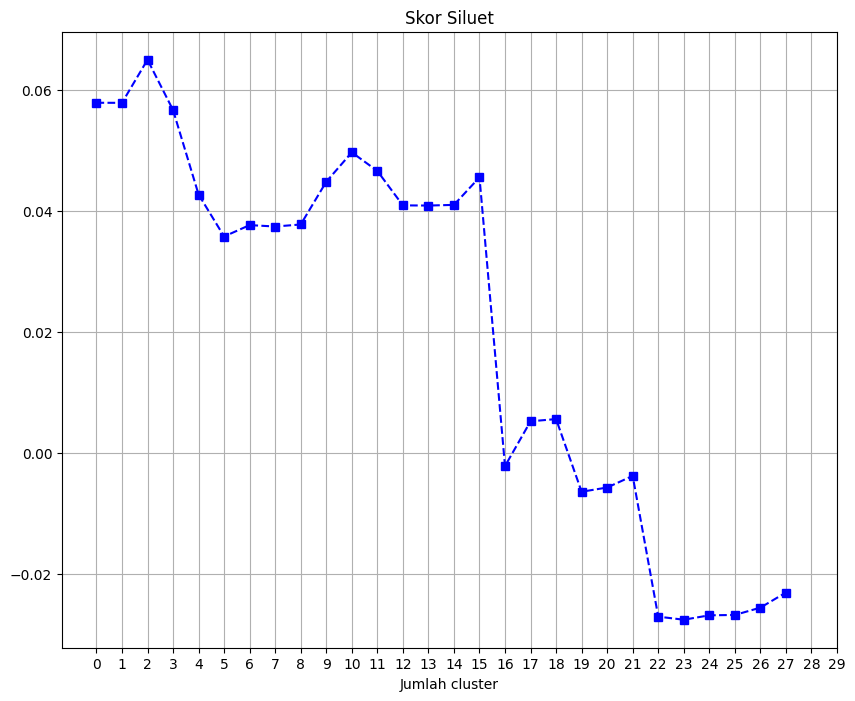

In [77]:
# Plotting Skor Siluet
plt.figure(figsize=(10,8))
plt.title('Skor Siluet')
plt.plot(sill, 'bs--')

# Menyesuaikan xticks untuk menampilkan range dari 0 hingga 30
plt.xticks(list(range(0, 30)), list(range(0, 30)))

plt.grid()
plt.xlabel('Jumlah cluster')
plt.show()


Visualisasi kinerja cluster

Untuk n_clusters = 2 Skor siluet rata-rata adalah: 0.0579235247156961
Untuk n_clusters = 3 Skor siluet rata-rata adalah: 0.0579100682307018
Untuk n_clusters = 4 Skor siluet rata-rata adalah: 0.06504566087096057
Untuk n_clusters = 5 Skor siluet rata-rata adalah: 0.056716226549909064
Untuk n_clusters = 6 Skor siluet rata-rata adalah: 0.04273484667973725
Untuk n_clusters = 7 Skor siluet rata-rata adalah: 0.03579087314777708
Untuk n_clusters = 8 Skor siluet rata-rata adalah: 0.037677158897455466
Untuk n_clusters = 9 Skor siluet rata-rata adalah: 0.03744232400168162
Untuk n_clusters = 10 Skor siluet rata-rata adalah: 0.03777817804364183
Untuk n_clusters = 11 Skor siluet rata-rata adalah: 0.04485143420529639
Untuk n_clusters = 12 Skor siluet rata-rata adalah: 0.04971644553983517
Untuk n_clusters = 13 Skor siluet rata-rata adalah: 0.04663949477318673
Untuk n_clusters = 14 Skor siluet rata-rata adalah: 0.04094245488125816
Untuk n_clusters = 15 Skor siluet rata-rata adalah: 0.04091338551239501


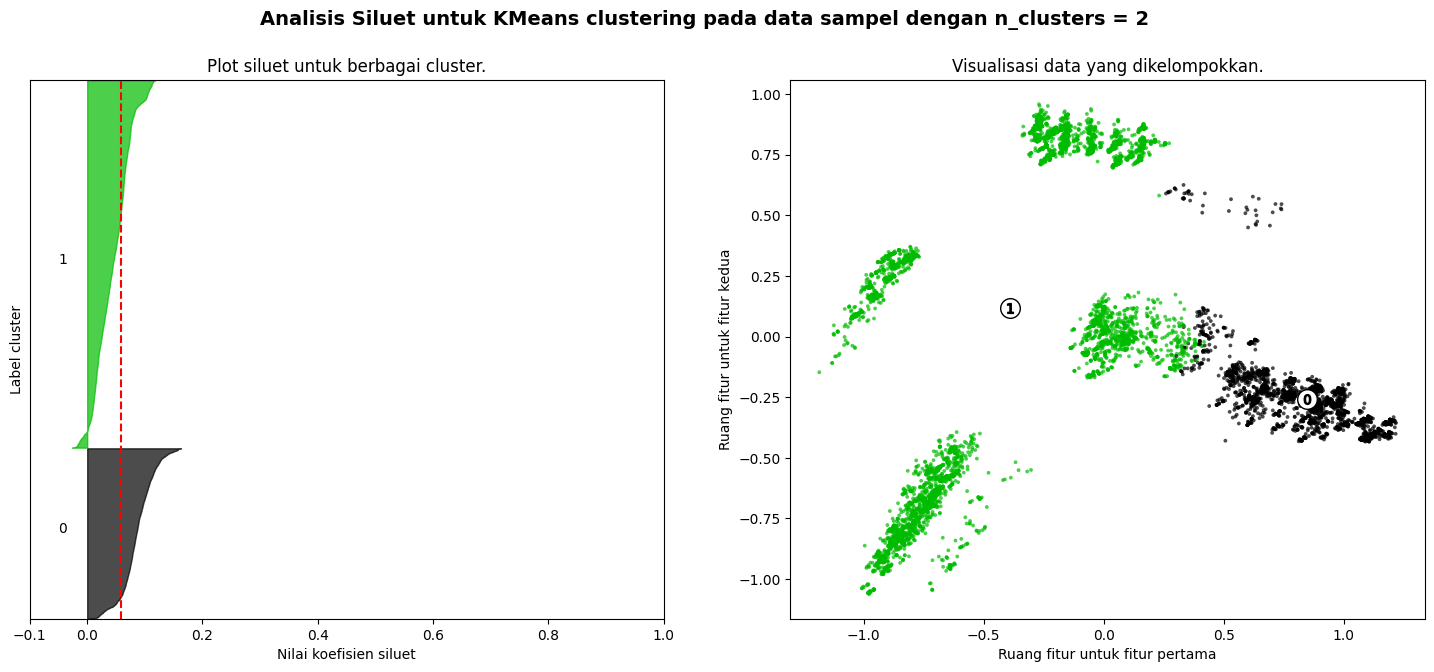

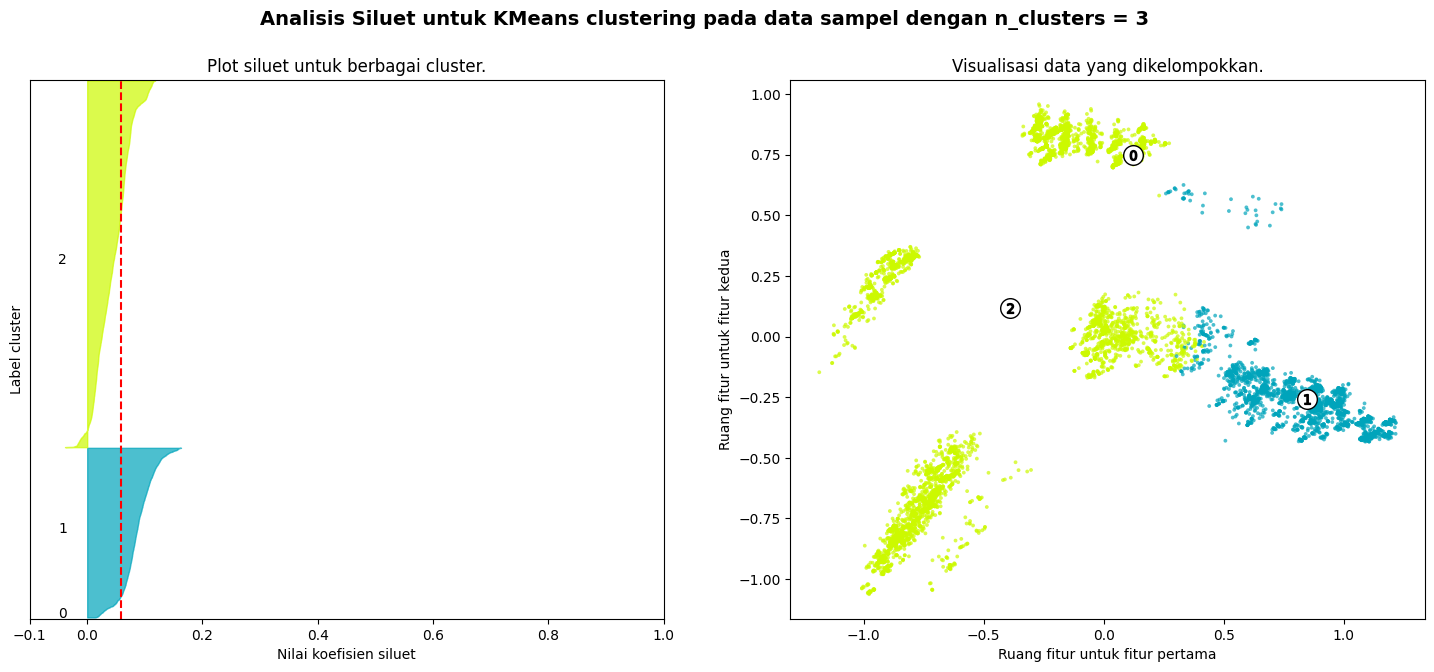

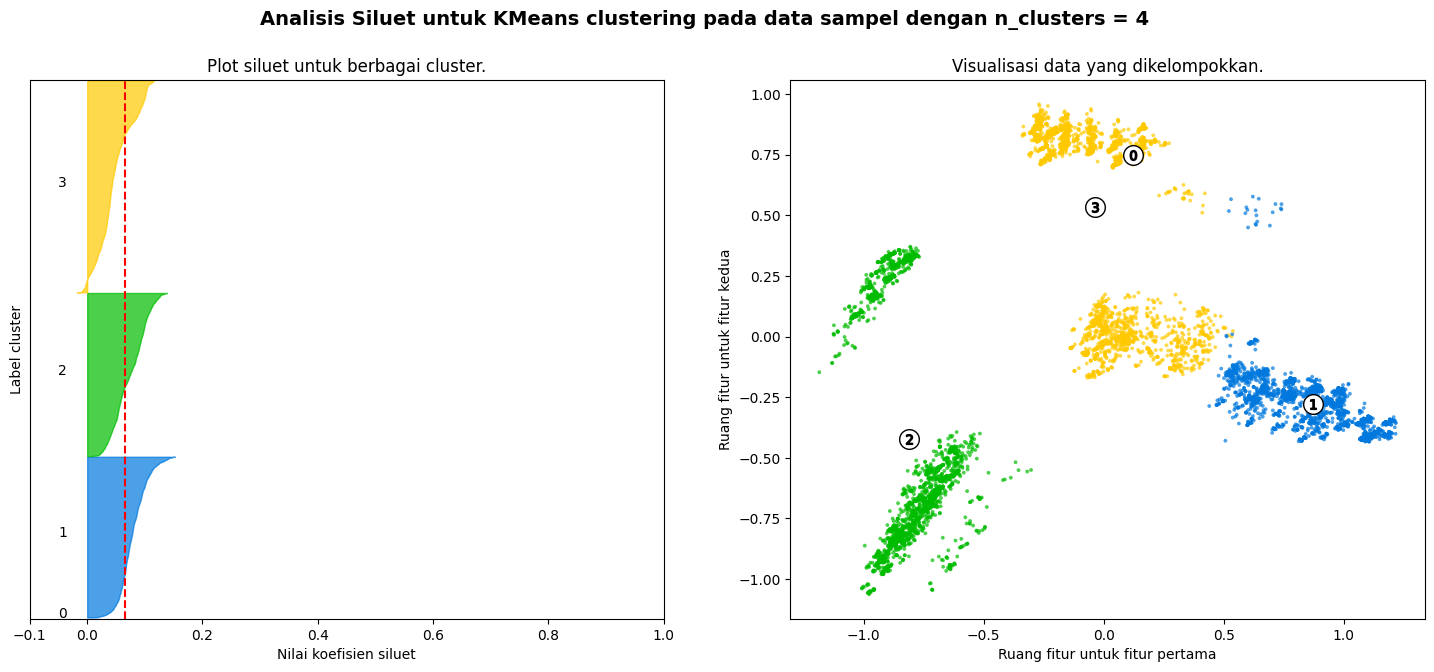

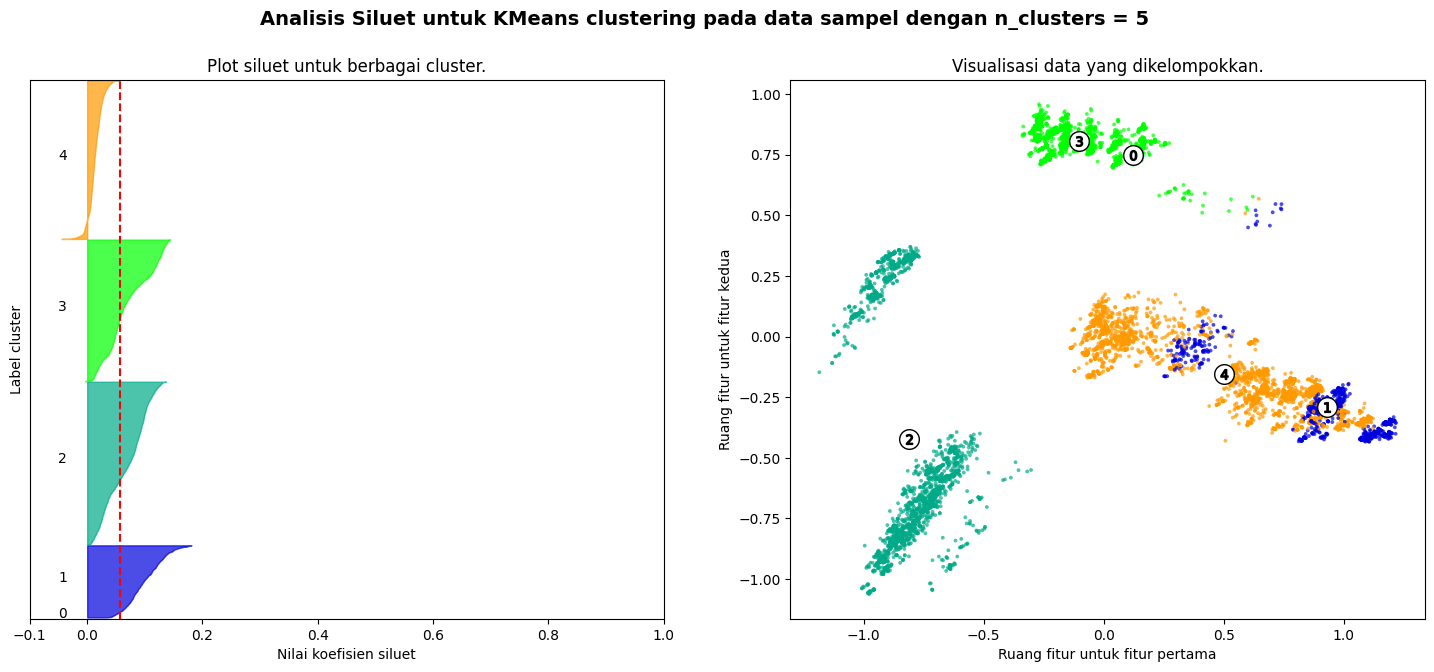

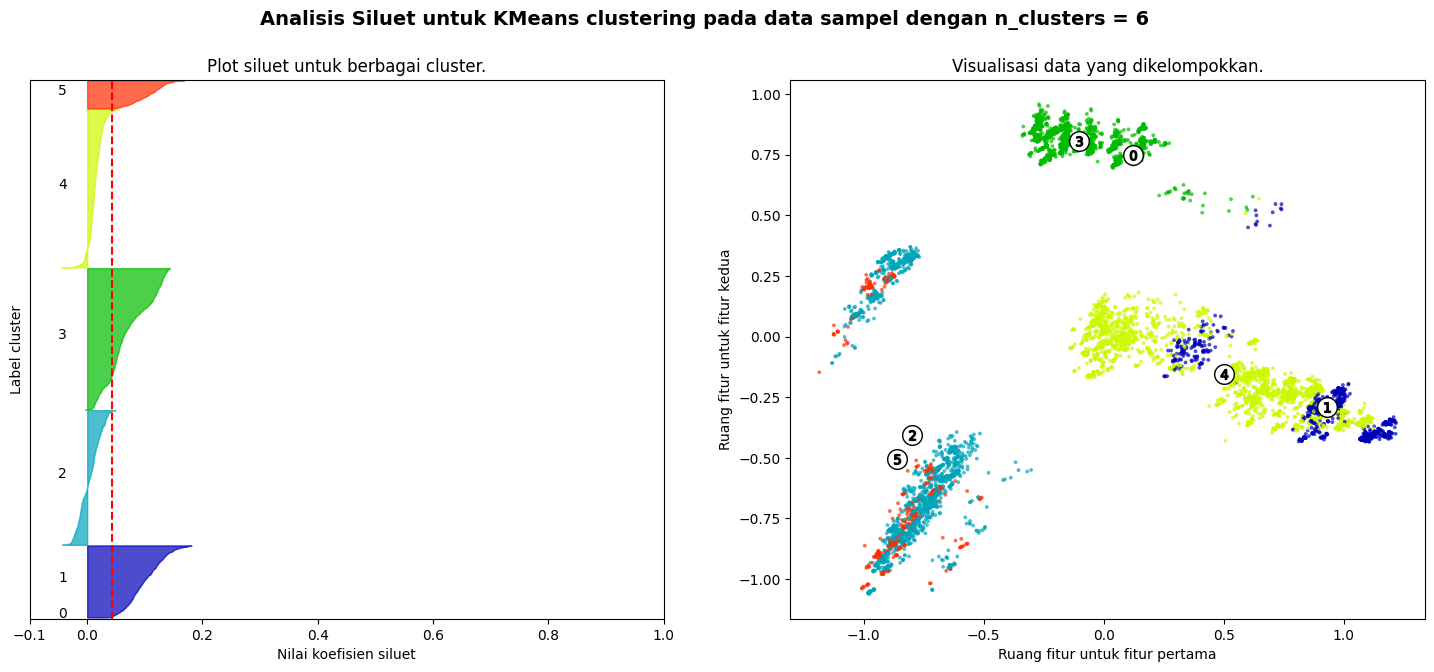

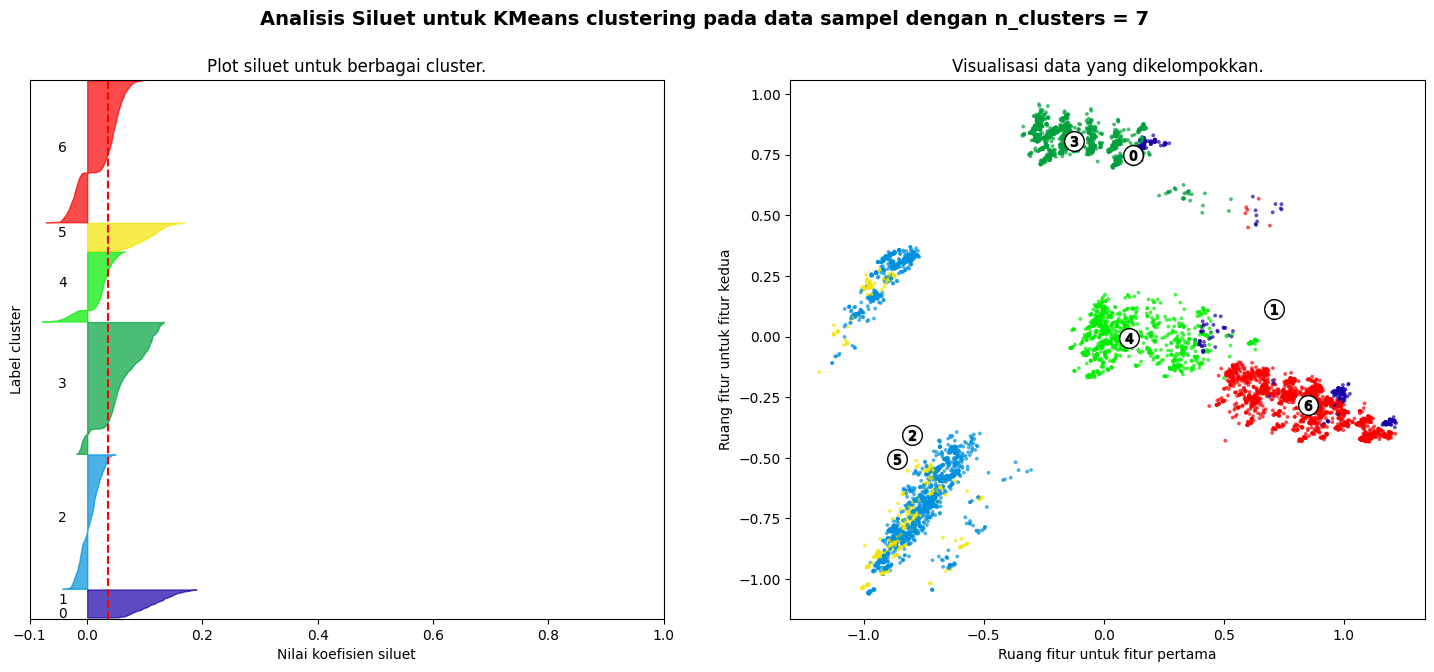

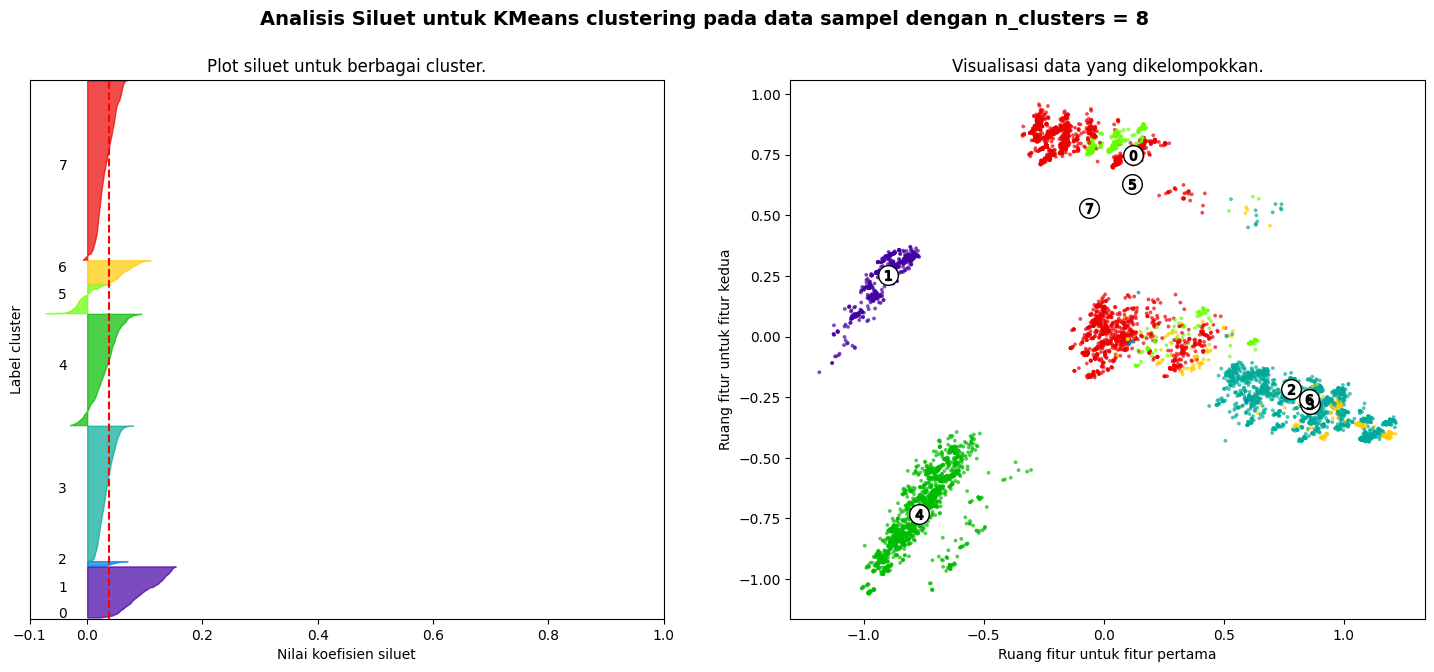

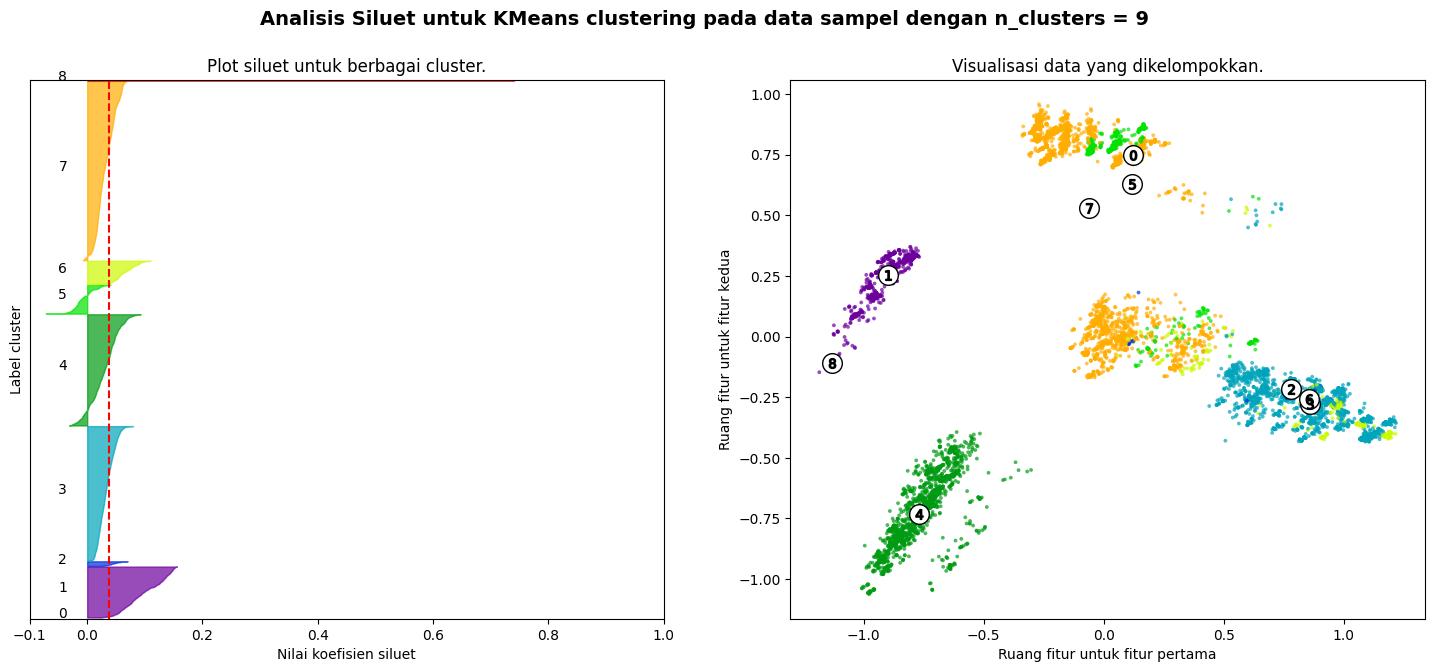

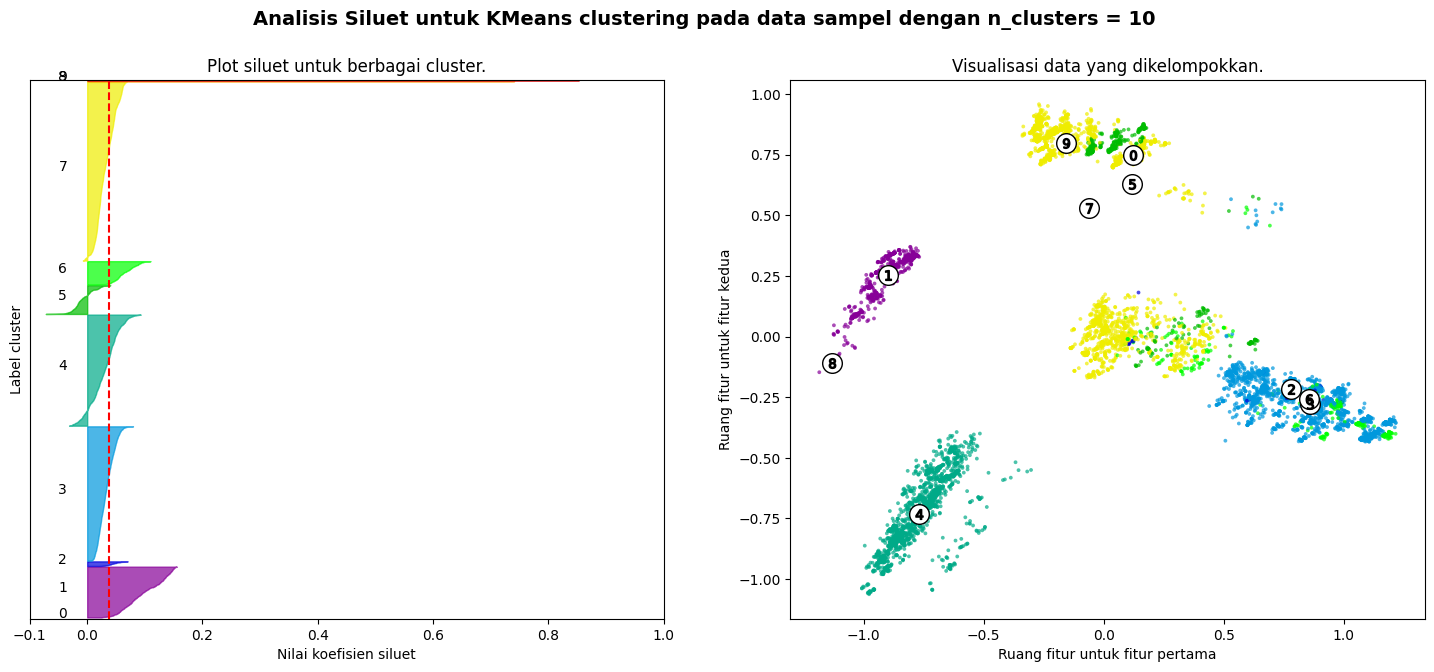

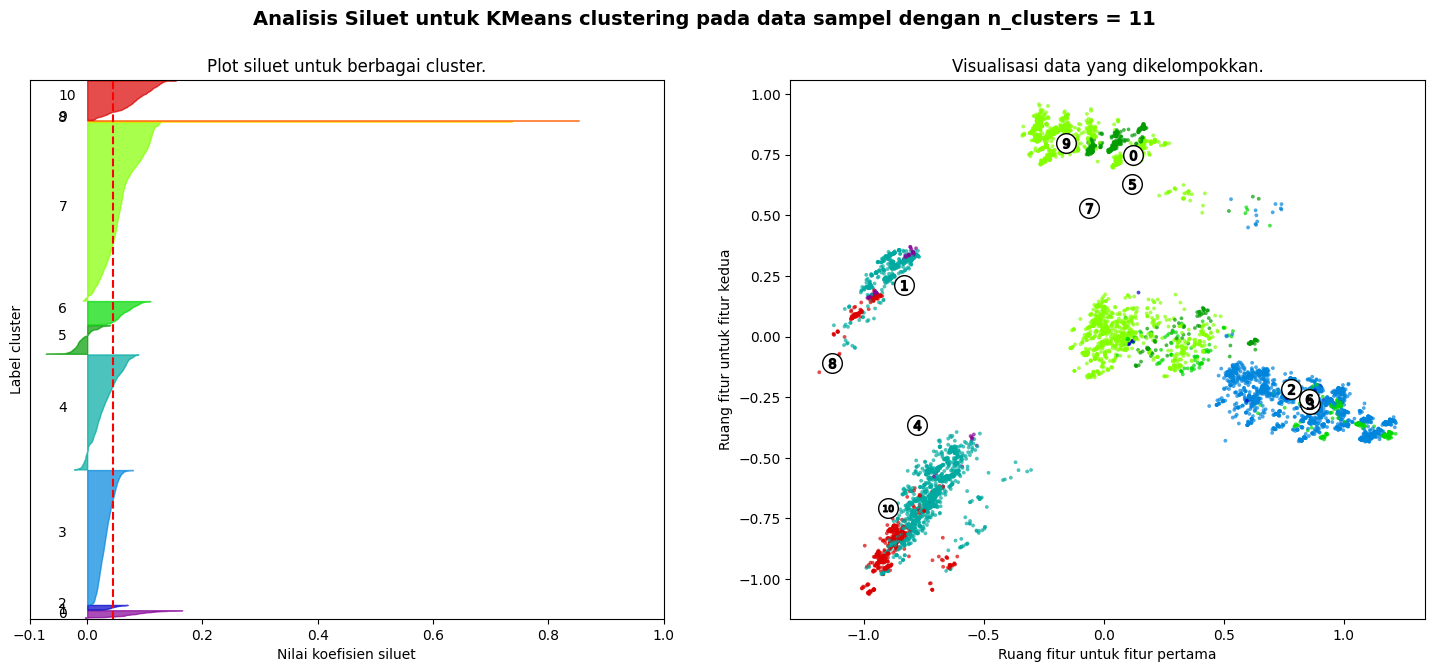

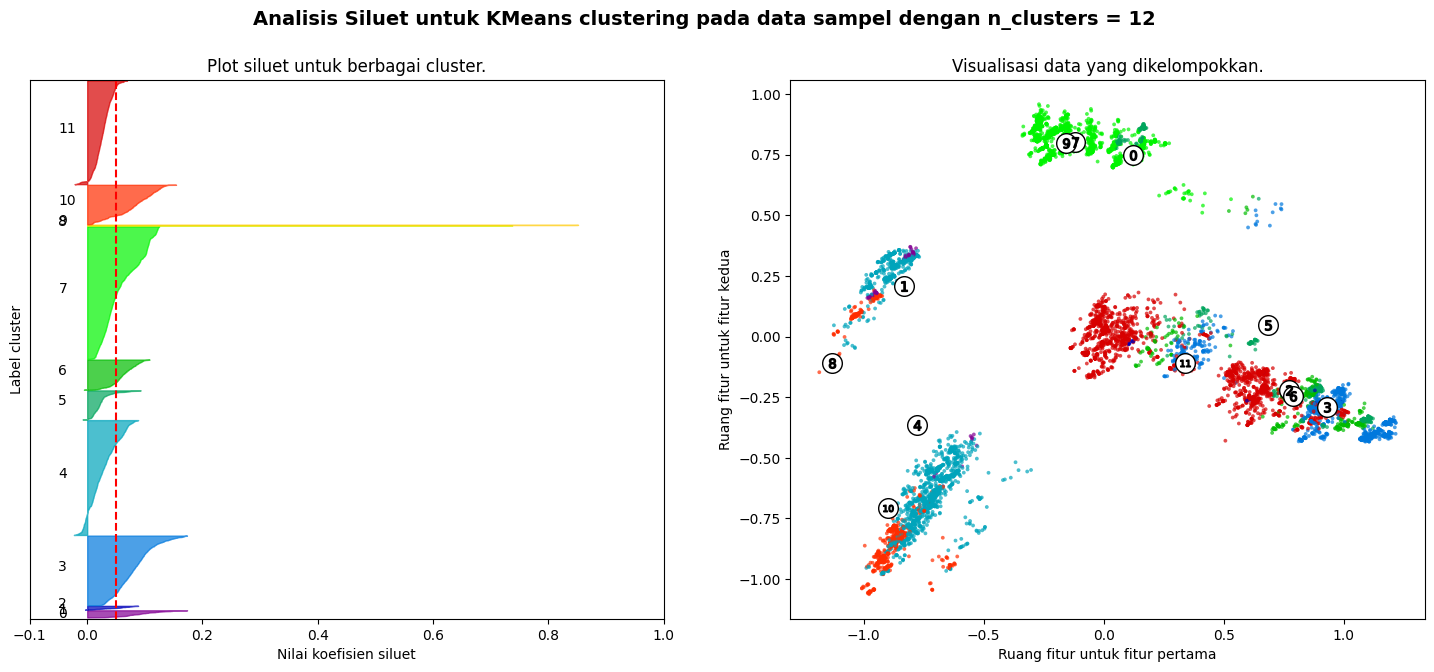

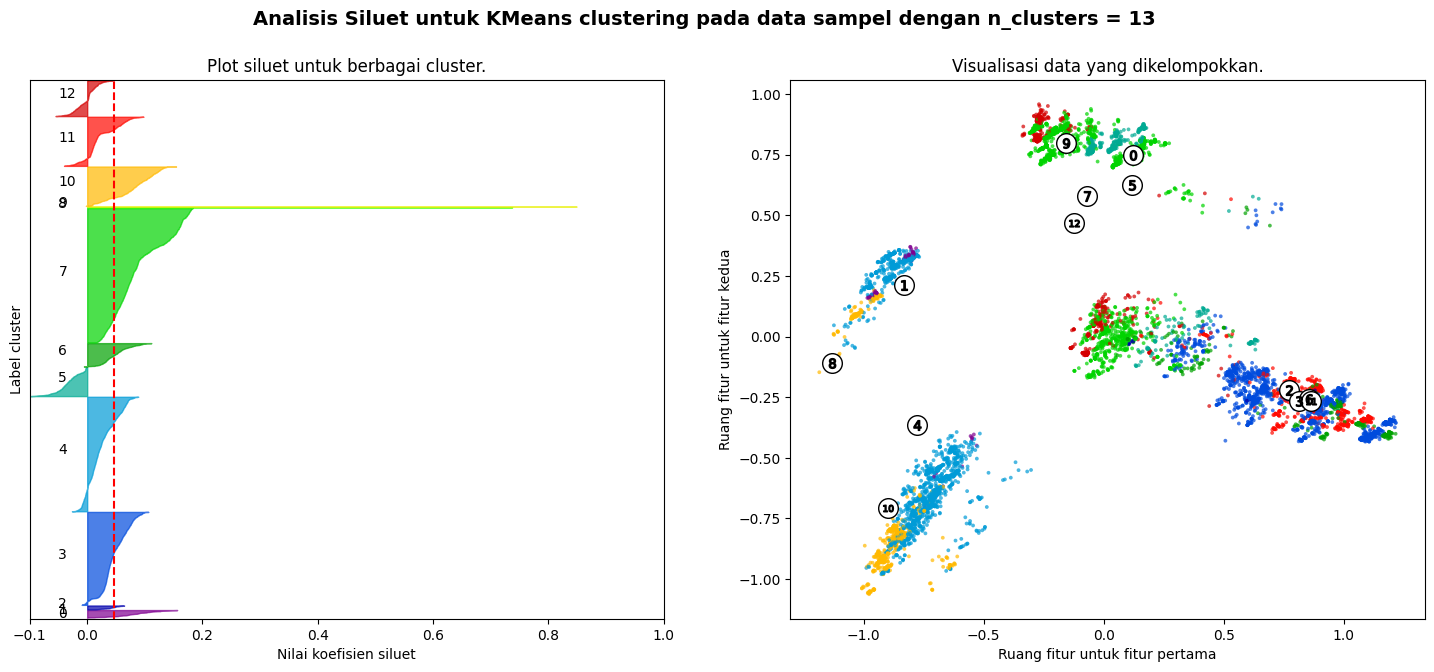

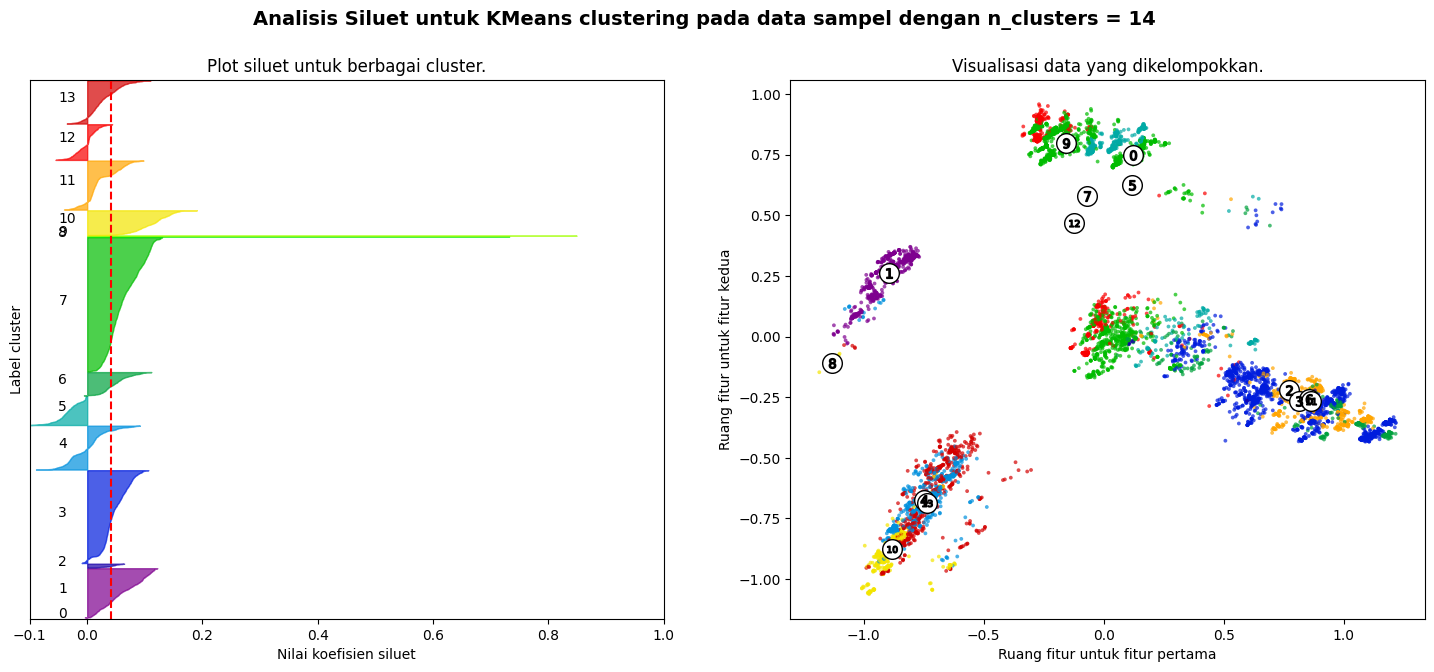

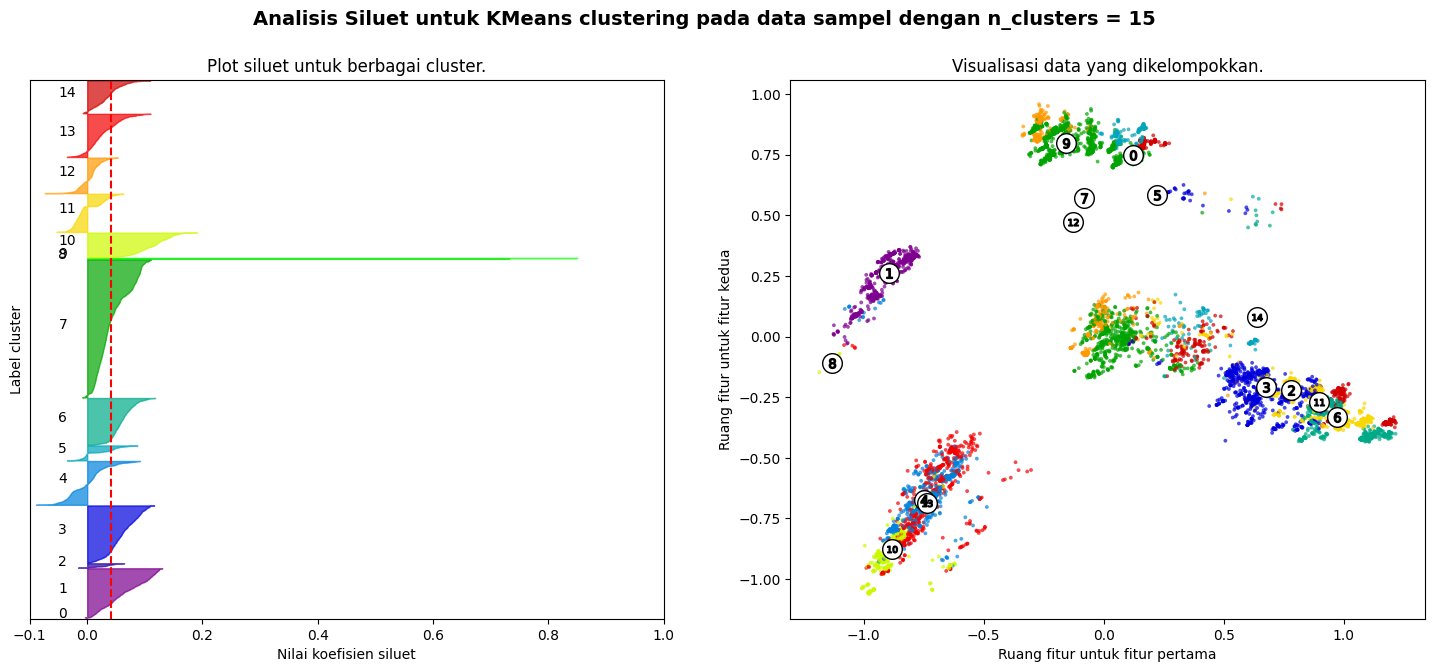

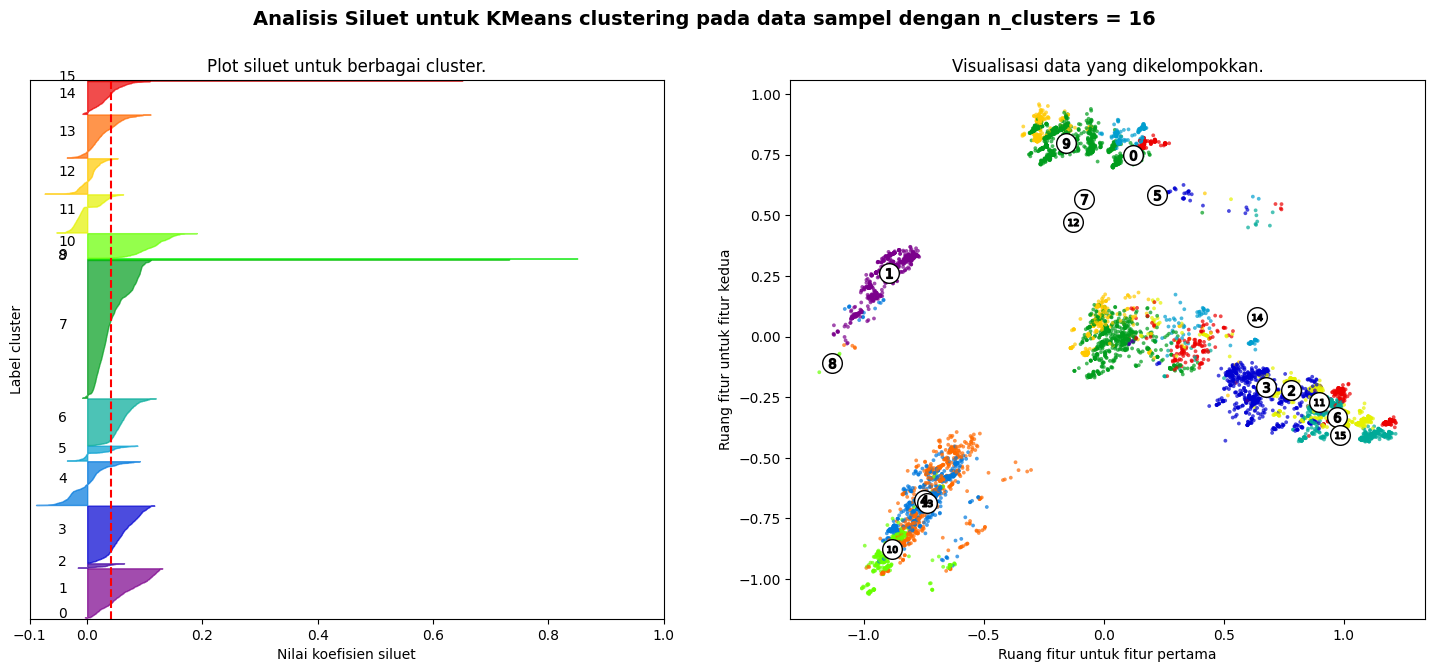

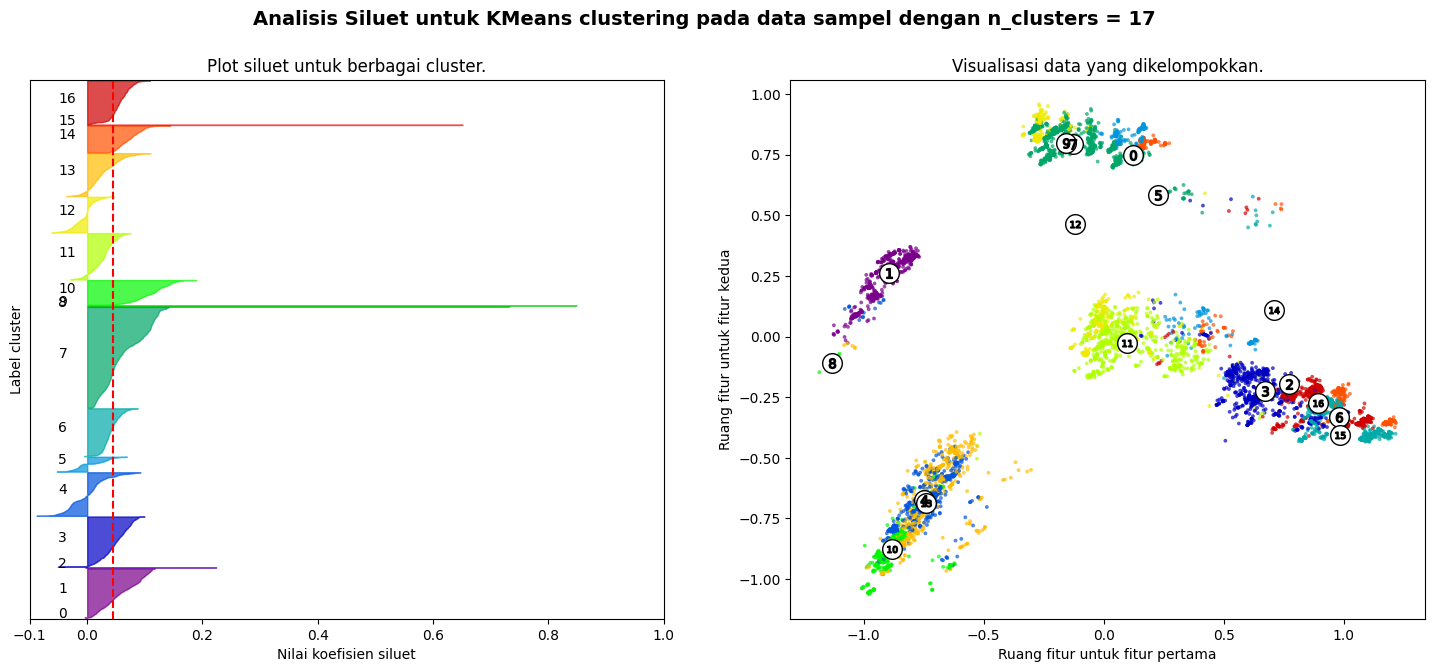

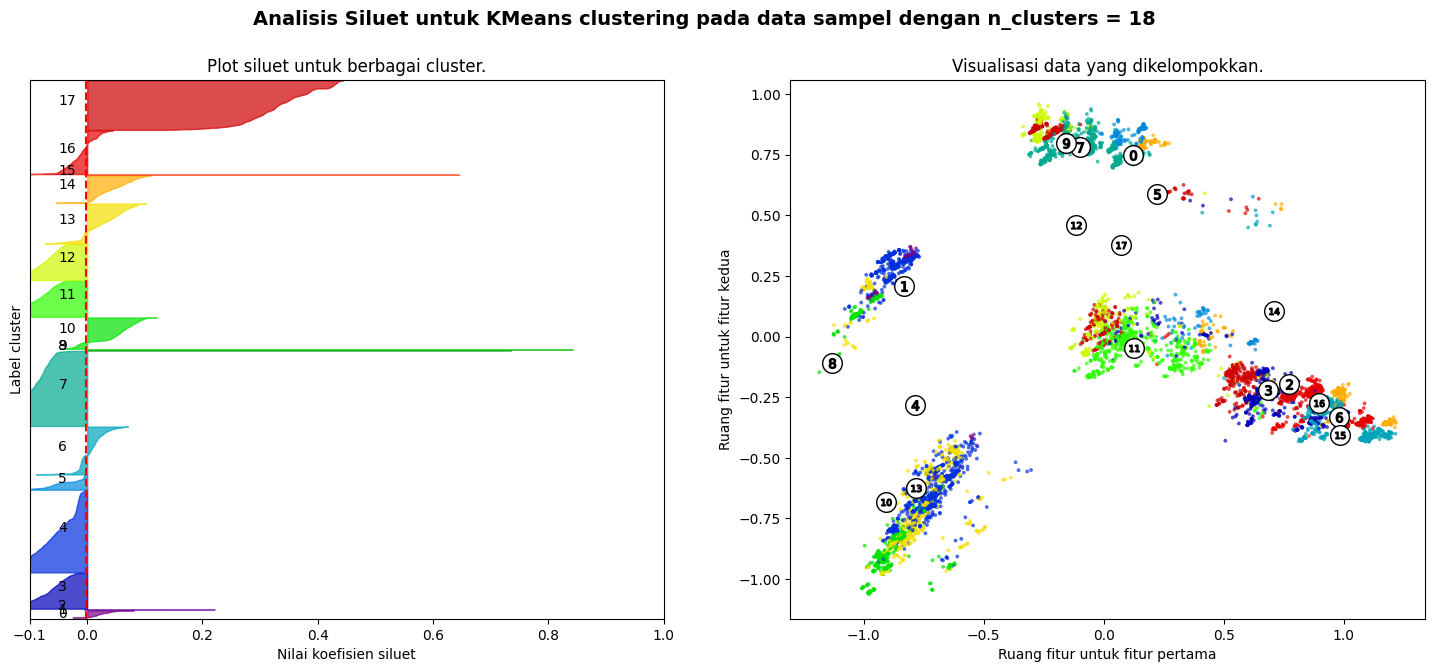

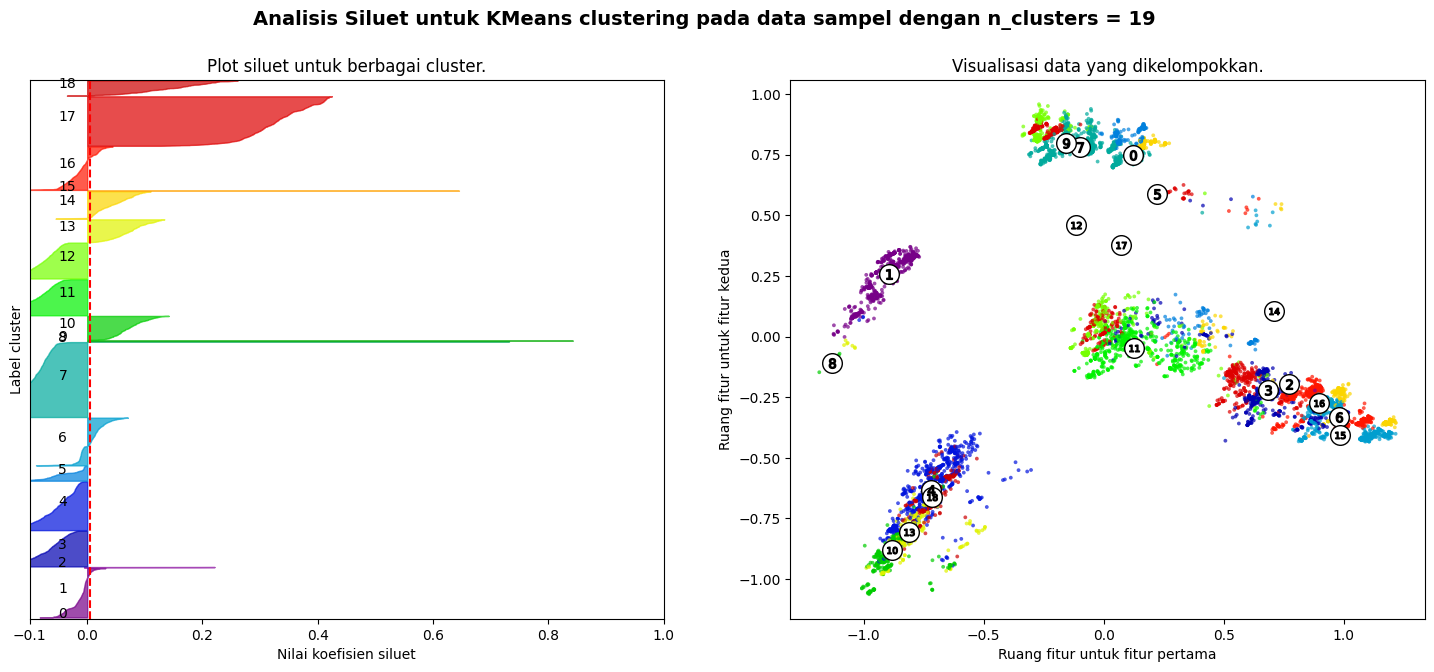

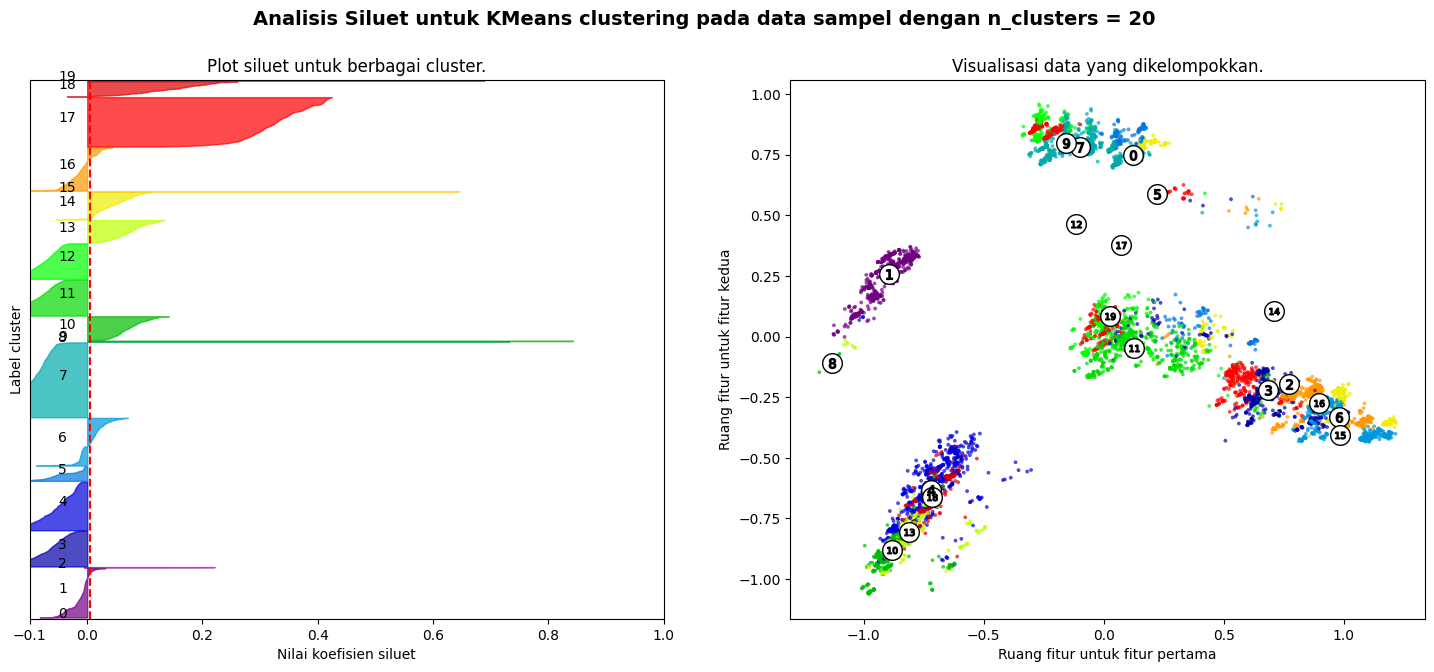

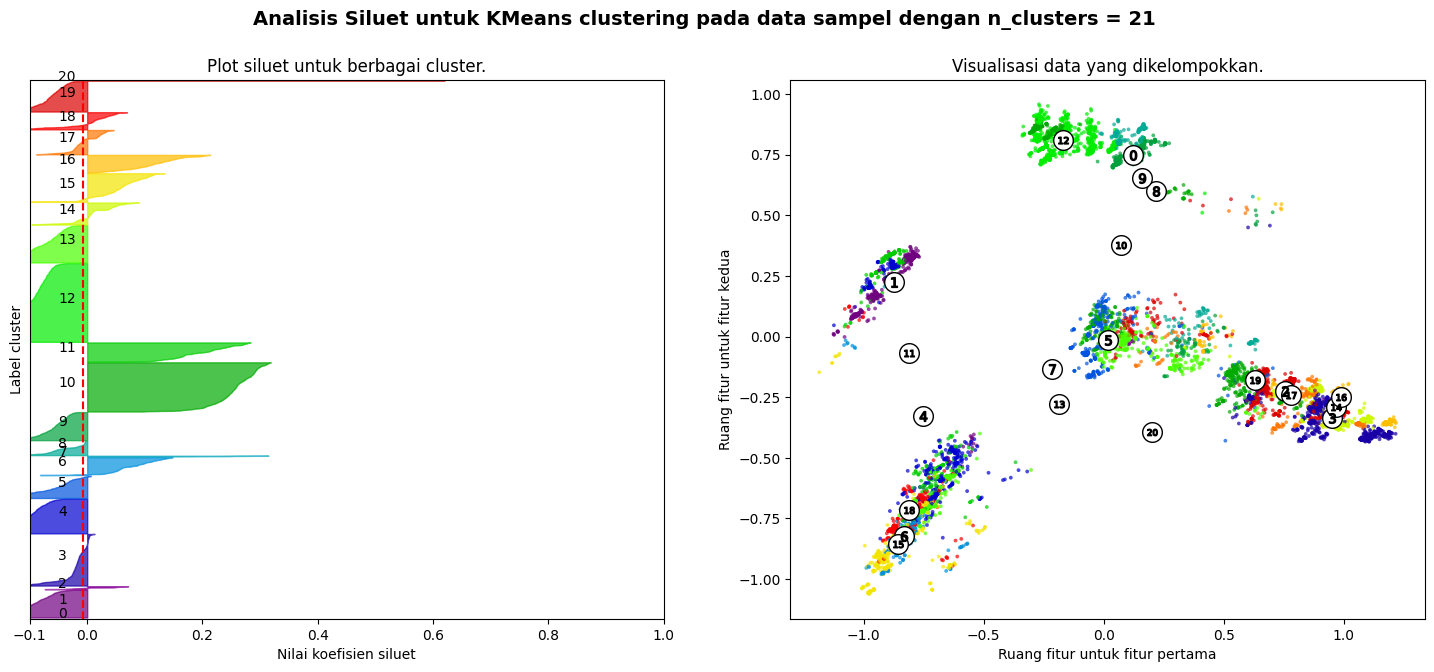

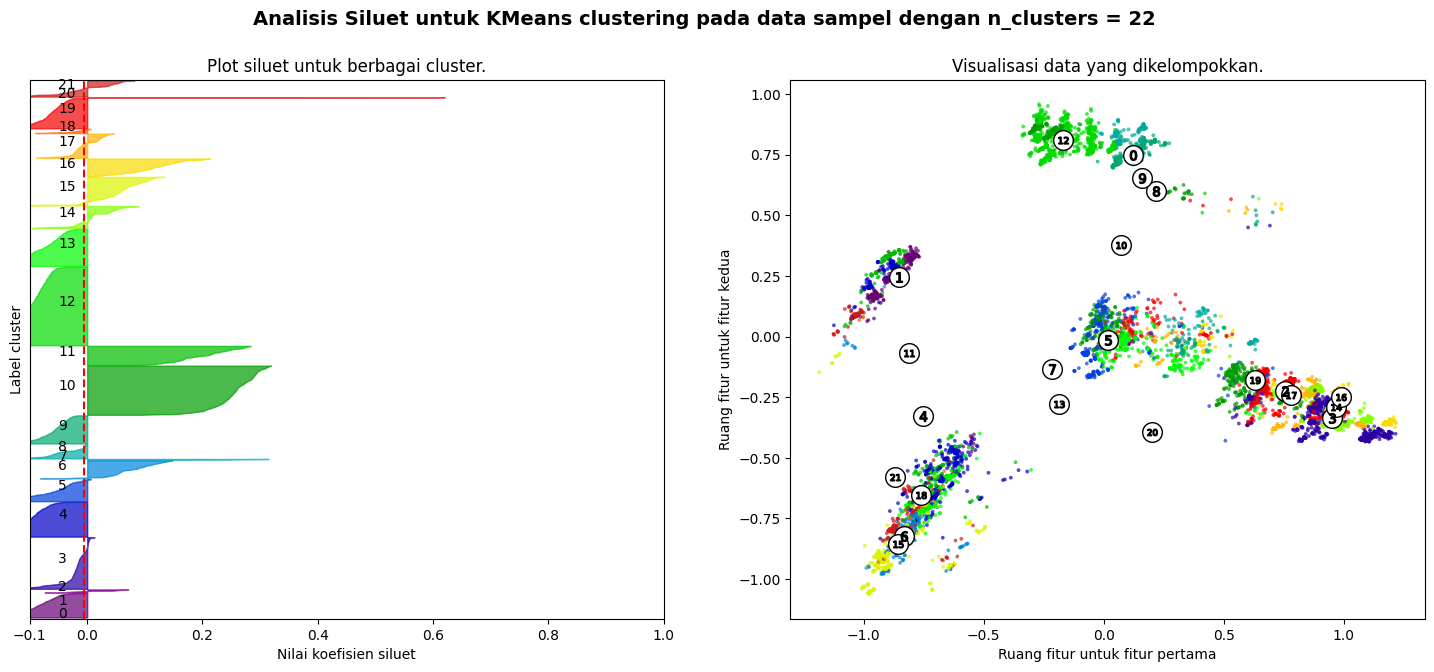

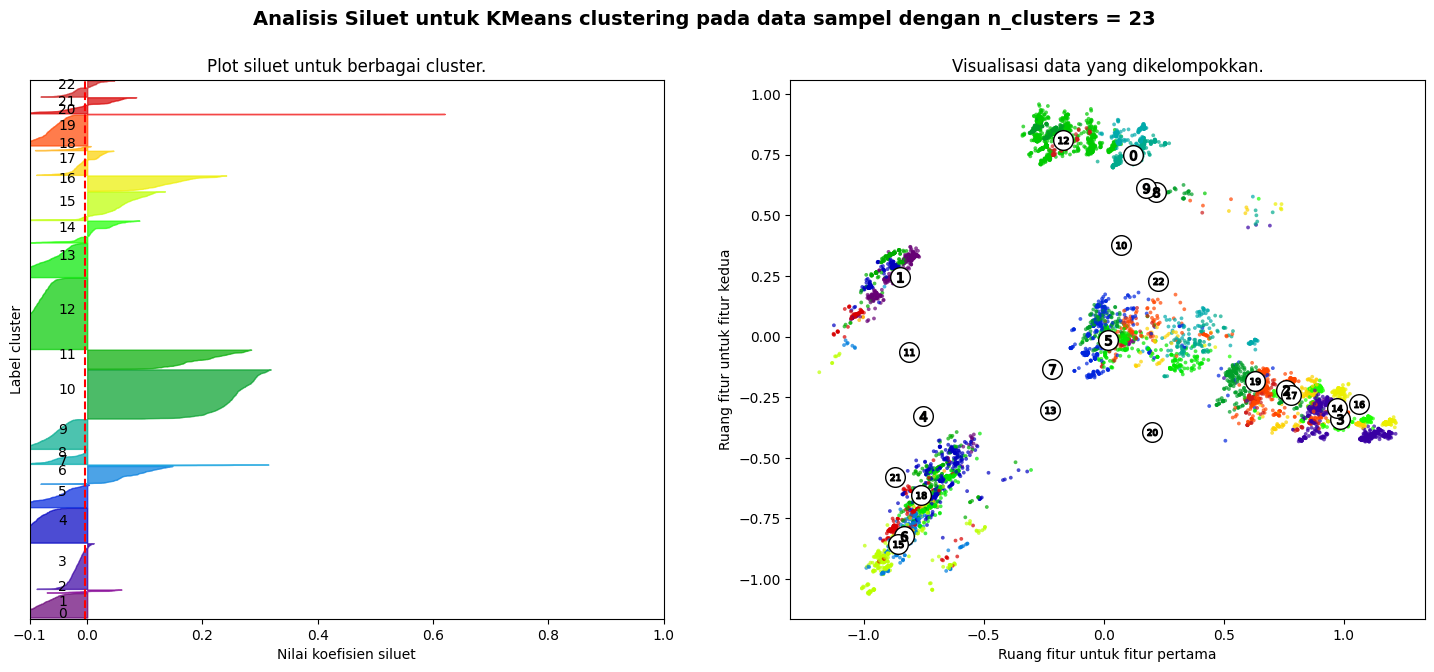

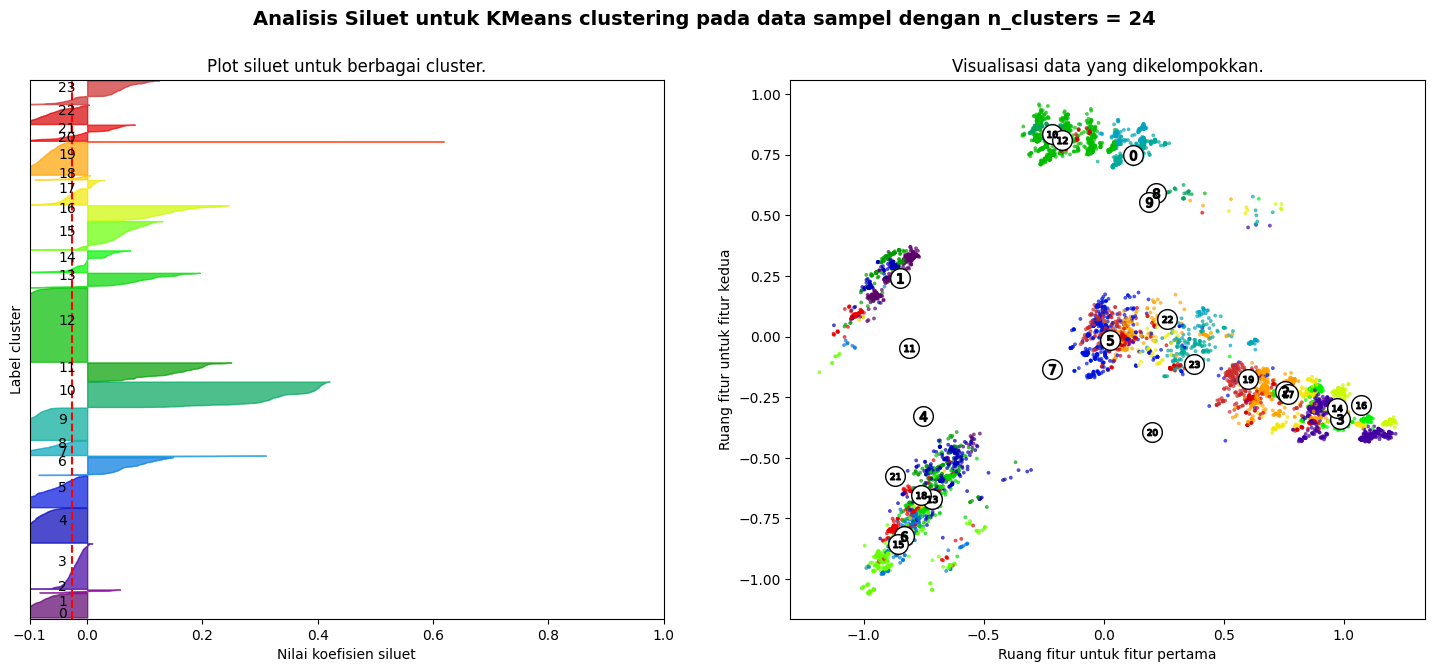

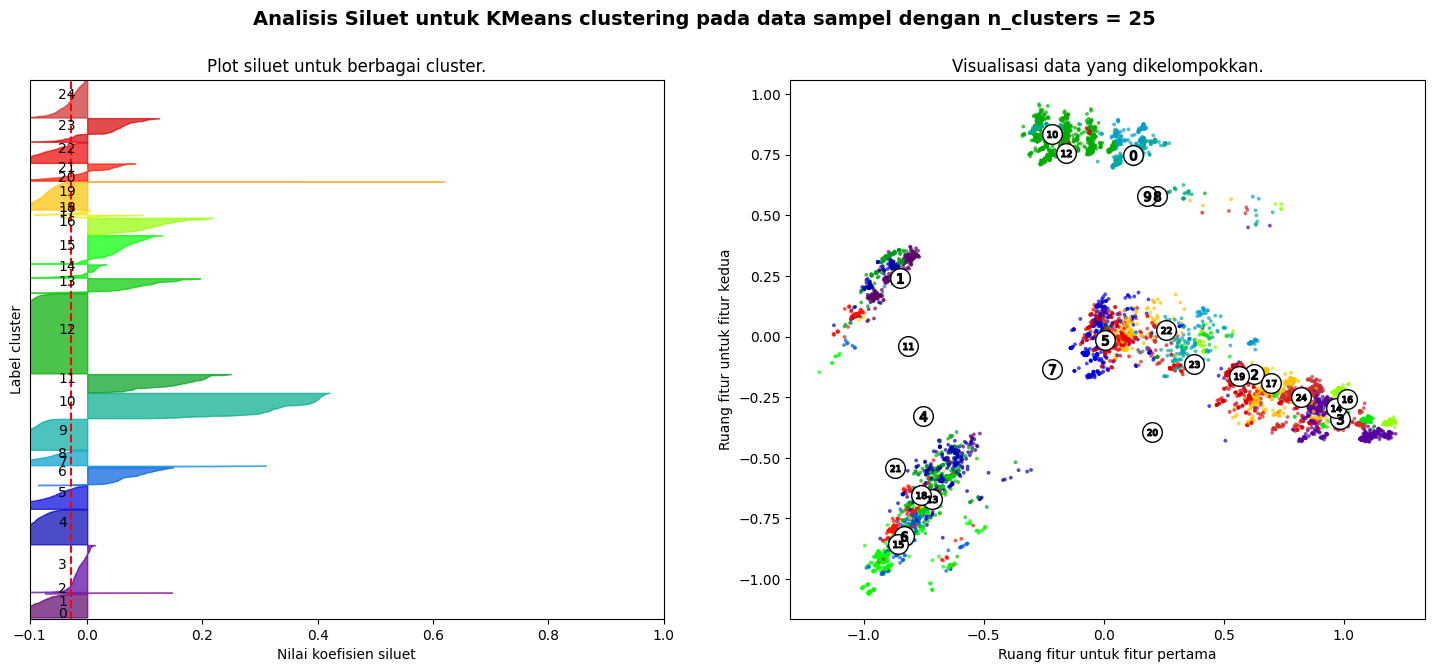

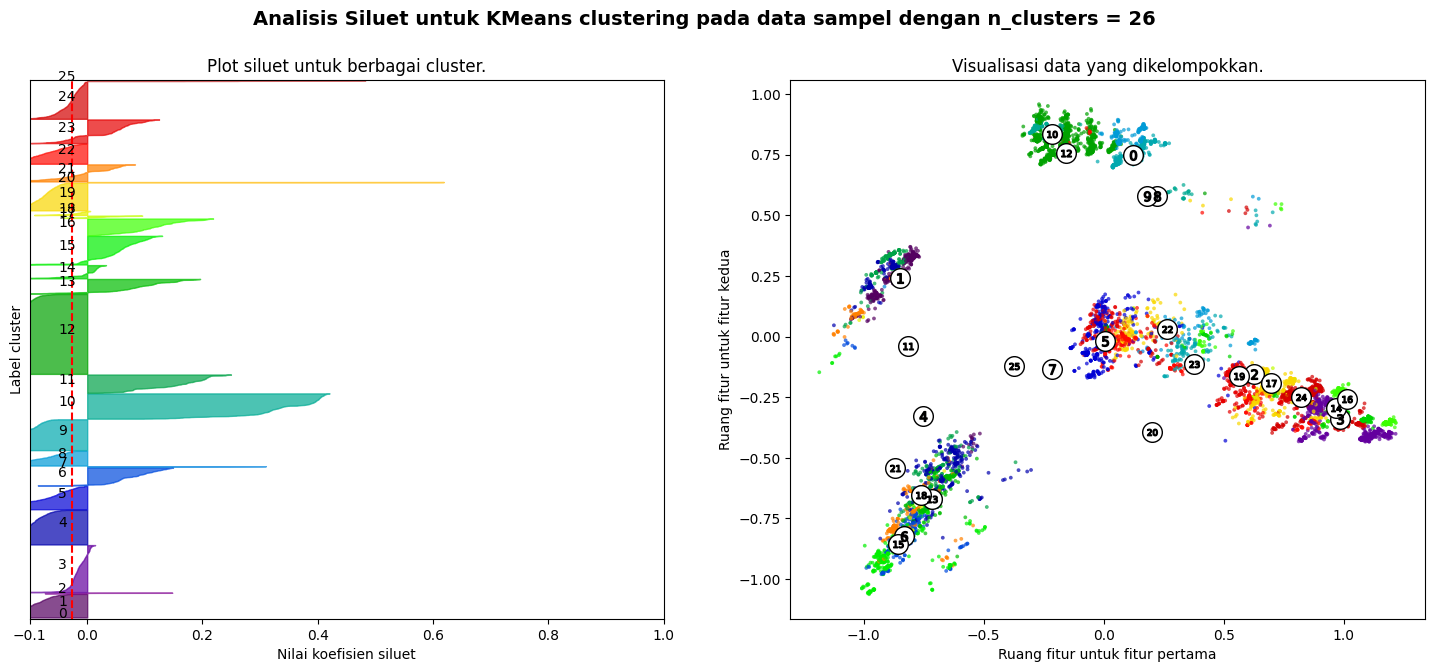

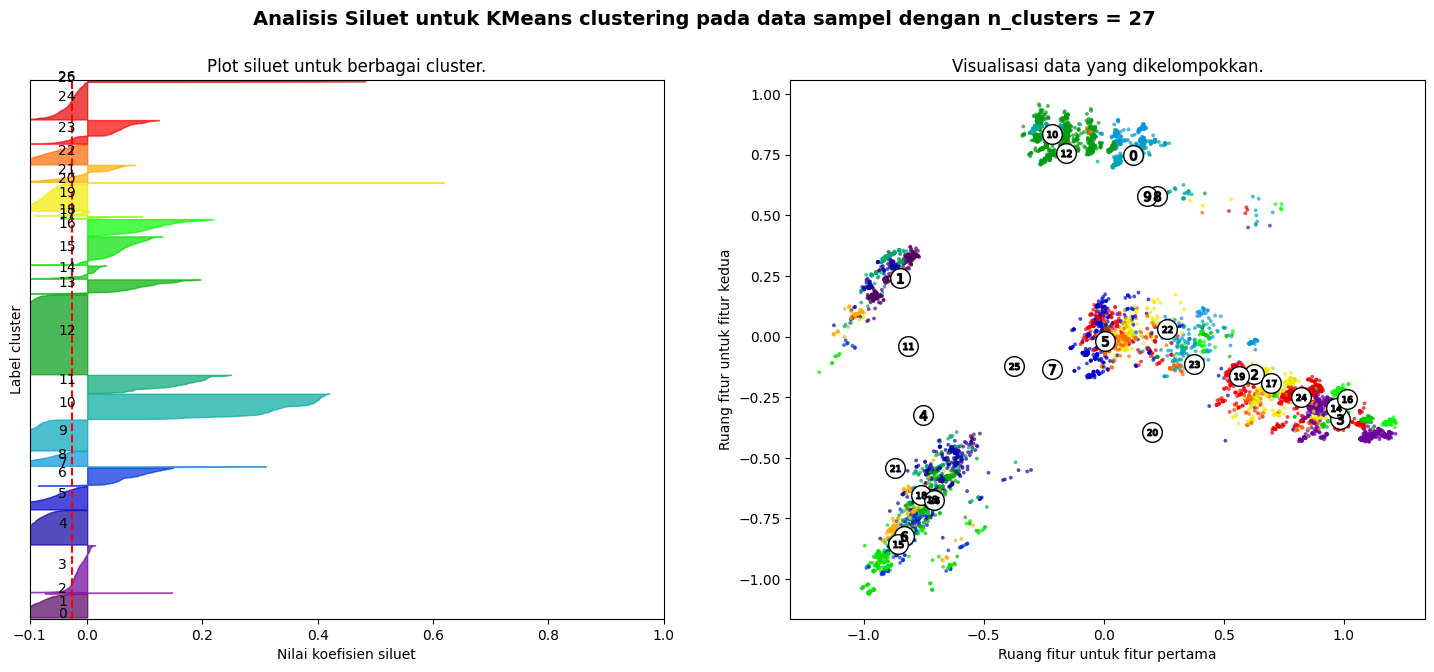

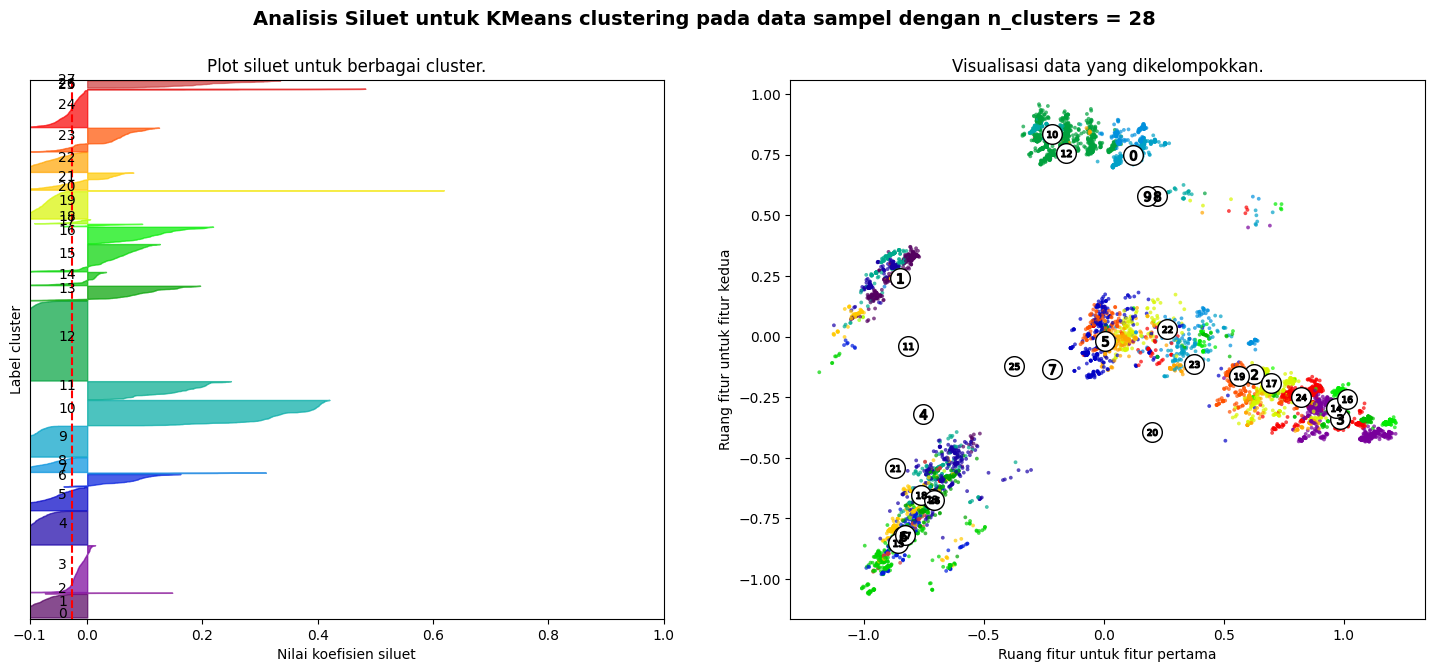

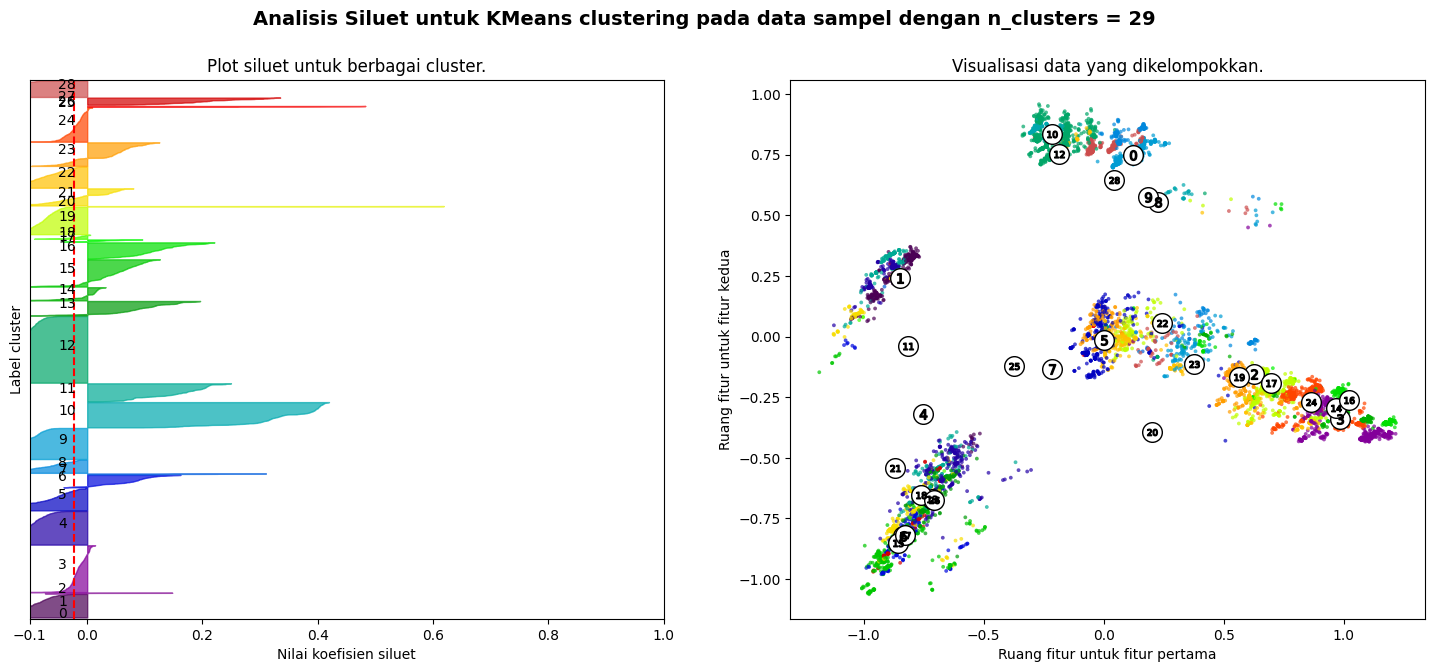

In [78]:
# X = pca_score (nilai komponen utama)
range_n_clusters = [i for i in range(2, 30)]  # Rentang jumlah cluster dari 2 hingga 30

for n_clusters in range_n_clusters:
    # Membuat subplot dengan 1 baris dan 2 kolom
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Subplot pertama untuk plot siluet
    ax1.set_xlim([-0.1, 1])  # Membatasi nilai x antara -0.1 dan 1
    # (n_clusters+1)*10 untuk memberikan ruang kosong antara plot siluet
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inisialisasi clusterer dengan jumlah cluster n_clusters dan seed acak 10 untuk reprodusibilitas
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)  # Prediksi label untuk setiap data

    # Skor siluet rata-rata untuk semua sampel
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Untuk n_clusters =", n_clusters,
          "Skor siluet rata-rata adalah:", silhouette_avg)

    # Menghitung skor siluet untuk setiap sampel
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10  # Posisi awal pada sumbu y untuk setiap cluster
    for i in range(n_clusters):
        # Mengagregatkan nilai skor siluet untuk sampel yang termasuk dalam cluster ke-i, dan mengurutkannya
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()  # Mengurutkan nilai skor siluet

        size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Ukuran cluster
        y_upper = y_lower + size_cluster_i  # Posisi akhir pada sumbu y untuk cluster ini

        color = cm.nipy_spectral(float(i) / n_clusters)  # Warna untuk setiap cluster
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Menandai plot siluet dengan nomor cluster di tengah
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Menghitung posisi y_lower untuk plot berikutnya
        y_lower = y_upper + 10  # 10 untuk sampel kosong

    ax1.set_title("Plot siluet untuk berbagai cluster.")
    ax1.set_xlabel("Nilai koefisien siluet")
    ax1.set_ylabel("Label cluster")

    # Garis vertikal untuk skor siluet rata-rata semua nilai
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Menghapus label/tick pada sumbu y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])  # Mengatur tick pada sumbu x

    # Subplot kedua untuk visualisasi cluster yang terbentuk
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)  # Warna untuk setiap cluster
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Menandai pusat cluster
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')  # Menggambar lingkaran putih pada pusat cluster

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')  # Menandai setiap pusat cluster dengan angka

    ax2.set_title("Visualisasi data yang dikelompokkan.")
    ax2.set_xlabel("Ruang fitur untuk fitur pertama")
    ax2.set_ylabel("Ruang fitur untuk fitur kedua")
    plt.suptitle(("Analisis Siluet untuk KMeans clustering pada data sampel "
                  "dengan n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')  # Judul besar untuk keseluruhan plot

plt.show()  # Menampilkan plot

### Membuat model KMeans

In [79]:
# buat model KMeans
kmeans_model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)

In [80]:
# fit a model
kmeans_model.fit(pca_score)

KMeans(n_clusters=4, random_state=10)

In [81]:
# melatih model K-means pada dataset
y_predict= kmeans_model.predict(pca_score)

In [82]:
# Prediksi cluster dan evaluasi skor siluet
score = silhouette_score(pca_score, y_predict)
print("Skor siluet adalah {}".format(score))

Skor siluet adalah 0.06504566087096057


In [83]:
# Menambahkan kolom terpisah untuk cluster
netflix_df["cluster_kmeans"] = y_predict

In [84]:
netflix_df.head()

show_id  type                  title         director  \
0      s1     0   Dick Johnson Is Dead  kirsten johnson   
1      s2     1          Blood & Water          unknown   
2      s3     1              Ganglands  julien leclercq   
3      s4     1  Jailbirds New Orleans          unknown   
4      s5     1           Kota Factory          unknown   

                                                cast        country  \
0                                            unknown  united states   
1  ama qamata, khosi ngema, gail mabalane, thaban...   south africa   
2  sami bouajila, tracy gotoas, samuel jouy, nabi...        unknown   
3                                            unknown        unknown   
4  mayur more, jitendra kumar, ranjan raj, alam k...          india   

  date_added  release_year  rating   duration  \
0 2021-09-25          2020       1     90 min   
1 2021-09-24          2021       0  2 Seasons   
2 2021-09-24          2021       0   1 Season   
3 2021-09-24          2021       0   1 Season   
4 2021-09-24          2021       0  2 Seasons   

                                              genres  \
0                                      documentaries   
1    international tv shows, tv dramas, tv mysteries   
2  crime tv shows, international tv shows, tv act...   
3                             docuseries, reality tv   
4  international tv shows, romantic tv shows, tv ...   

                                         description  \
0  as her father nears the end of his life, filmm...   
1  after crossing paths at a party, a cape town t...   
2  to protect his family from a powerful drug lor...   
3  feuds, flirtations and toilet talk go down amo...   
4  in a city of coaching centers known to train i...   

                                     new_description  cluster_kmeans  
0  father nears end life, filmmaker kirsten johns...               3  
1  crossing path party, cape town teen set prove ...               2  
2  protect family powerful drug lord, skilled thi...               2  
3  feuds, flirtation toilet talk go among incarce...               2  
4  city coaching center known train india’s fines...               2

### Ploting beberapa grafik untuk memvisualisasikan penugasan baris ke cluster

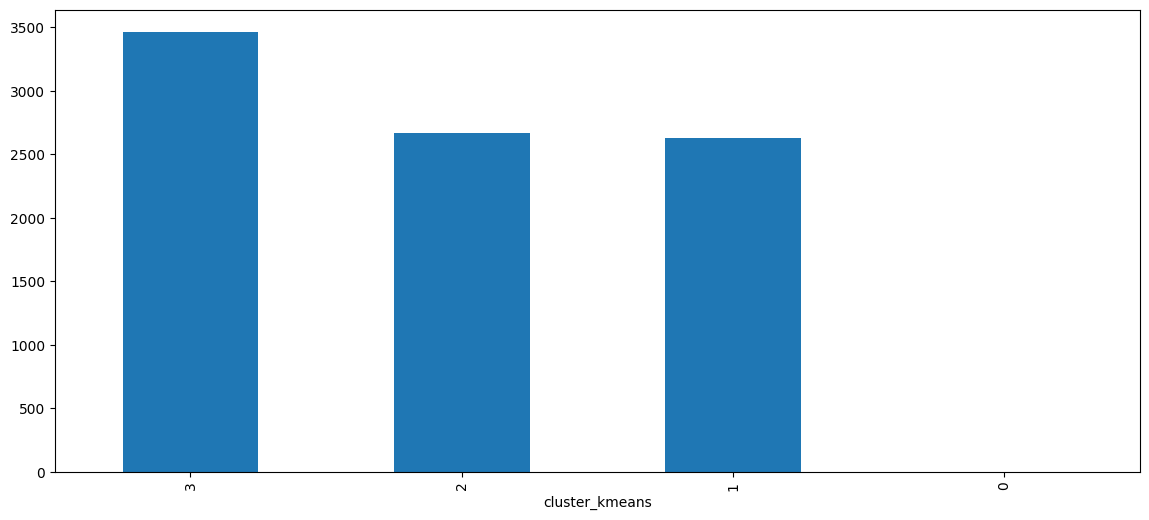

In [85]:
# fig, ax = plt.subplots(figsize=(15,6))
# sns.countplot(x='cluster_kmeans', hue='type',lw=5, color='blue', data= netflix_df, ax=ax)
# count = netflix_df.cluster_kmeans.value_counts
netflix_df.cluster_kmeans.value_counts().plot(kind='bar')
# plt.pie(count)
plt.show()

## Visualisasikan cluster mana yang memiliki film dan mana yang memiliki acara TV dari cluster KMeans

In [86]:
print(netflix_df['type'].value_counts())

type
0    6095
1    2668
Name: count, dtype: int64


In [87]:
# convert type sebagai film atau acara TV dari 0 atau 1
type = np.where(netflix_df.type == 0 , 'Movies', 'Tv Shows')
netflix_df['type'] = type

<Axes: xlabel='cluster_kmeans', ylabel='count'>

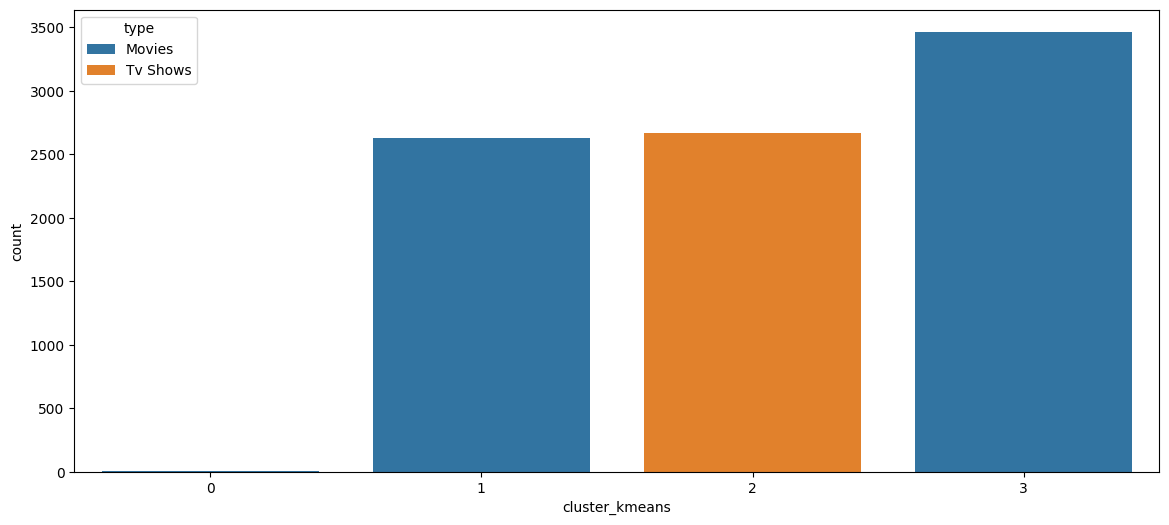

In [88]:
# visualisasikan alokasi film dan acara TV di berbagai cluster
sns.countplot(data = netflix_df, x = 'cluster_kmeans', hue = 'type')

### ***cluster 0,1,3 merepresentasikan movies***
### ***cluster 2, merepresentasikan TV-Shows***

# **Classification Model**

## Membuat Model Klasifikasi SVM

In [89]:
# import libraries for Classification Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [90]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
                        pca_score, netflix_df.cluster_kmeans,
                test_size = 0.20, random_state = 101 )

In [91]:
# building model with best estimaters
svm_model = SVC(kernel = 'linear')

# train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [92]:
# predicting for test set
test_score = svm_model.predict(X_test)

In [93]:
# print the classification report
display(classification_report(y_test, test_score, output_dict=True))

{'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 509.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 551.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 693.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1753.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1753.0}}

<Axes: >

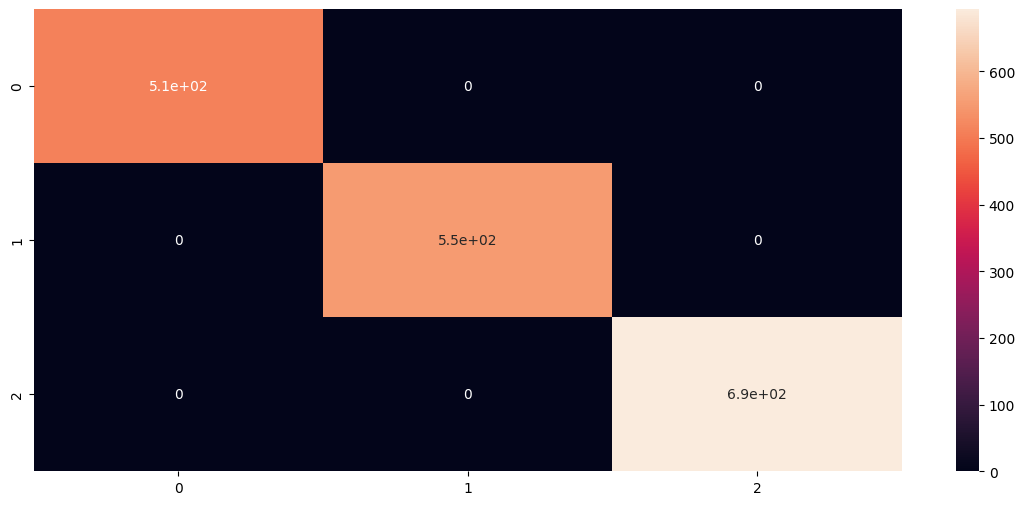

In [94]:
cnf_mat = confusion_matrix(y_test,test_score, labels=None, sample_weight=None, normalize=None)
sns.heatmap(cnf_mat , annot = True , cbar = 1)

## Pengoptimalan Klasifikasi

In [95]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
                        pca_score, netflix_df.cluster_kmeans,
                test_size = 0.20, random_state = 101 )

In [96]:
from sklearn.model_selection import GridSearchCV

# Using GridSearchCV to find optimum number of parameter
# defining parameter range
param_grid = {'C': [0.1, 1,  ],
              'gamma': [1, 0.1, ],
              'kernel': ['rbf','sigmoid','linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [97]:
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.455 total time= 2.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.459 total time= 2.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.444 total time= 2.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.454 total time= 2.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.452 total time= 2.0min
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.987 total time=   6.2s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.984 total time=   5.9s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.986 total time=   7.4s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.991 total time=   5.8s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.986 total time=   6.5s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.992 total time=  15.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=3)

In [98]:
print(f"The best estimater of svm is {grid.best_estimator_} \nThe best score of svm is {grid.best_score_} ")

The best estimater of svm is SVC(C=1, gamma=1, kernel='linear') 
The best score of svm is 0.9995720399429388 


In [104]:
# building model with best estimaters
svm_model_optimized = SVC(C = 1, gamma = 1, kernel = 'linear')

# train the model
svm_model_optimized.fit(X_train, y_train)

SVC(C=1, gamma=1, kernel='linear')

In [105]:
# predicting for test set
test_score_optimized = svm_model_optimized.predict(X_test)

In [106]:
# print the classification report
display(classification_report(y_test, test_score_optimized, output_dict=True))

{'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 509.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 551.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 693.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1753.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1753.0}}

<Axes: >

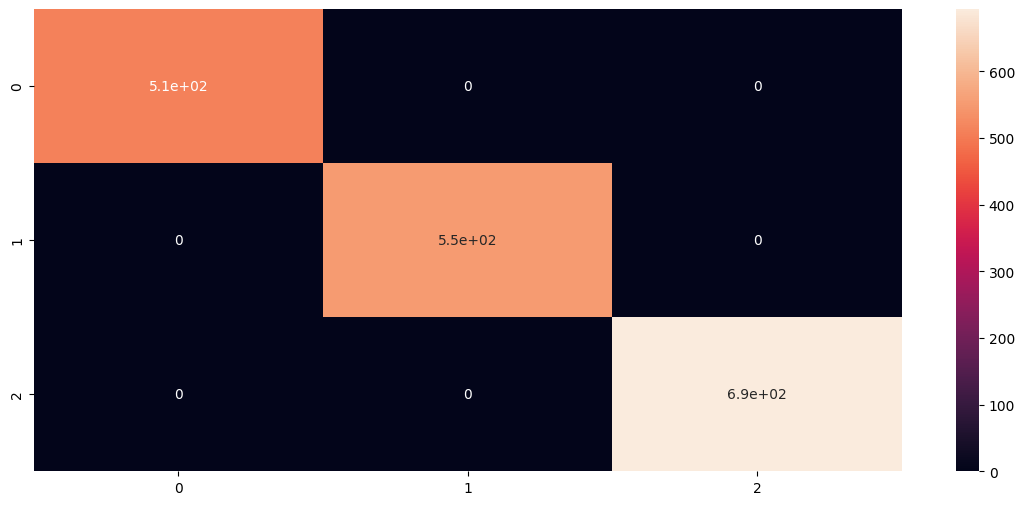

In [107]:
cnf_mat = confusion_matrix(y_test,test_score_optimized, labels=None, sample_weight=None, normalize=None)
sns.heatmap(cnf_mat , annot = True , cbar = 1)